<a href="https://colab.research.google.com/github/BruteForceOnly/dataanalytics/blob/main/Canada_2016_Census_Income_Groups_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
***
Family After-tax Income from Canada's 2016 Census is analyzed.
<br><br>
The dataset used is from a publicly available source.
<br><br>
This analysis has no explicit goal. It is exploratory.

# Canada

## Description
This section attempts to summarize family after-tax income data at the national level.

## Summary
* Canadian families are richer than they were in 2005.
* The proportion of families in low income groups fell; the proportion of families in high income groups rose.
* The highest income groups saw the most significant increases.



## Data
The section records the process by which the data was gathered and analyzed.

In [1]:
import pandas as pd

### Obtaining and Cleaning Data

In [2]:
can_income = pd.read_html(
    'https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Rp-eng.cfm?LANG=E&APATH=3&DETAIL=0&DIM=0&FL=A&FREE=0&GC=0&GID=0&GK=0&GRP=1&PID=110237&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2016&THEME=119&VID=0&VNAMEE=&VNAMEF=',
    header=1,
    index_col=0
)[0]

In [3]:
can_income

,2015Footnote 1,2005Footnote 2
Census family after-tax income groups (21),,
Total - After-tax income of census family,9840730,8896845
"Under $5,000",109555,127710
"$5,000 to $9,999",69820,93690
"$10,000 to $14,999",103745,132385
"$15,000 to $19,999",163095,201355
"$20,000 to $24,999",207410,242665
"$25,000 to $29,999",312595,345115
"$30,000 to $34,999",406730,416890
"$35,000 to $39,999",421845,468070


In [4]:
# rename columns
can_income.columns = ['2015', '2005']
# remove the parenthses in the index name
can_income.index.name = can_income.index.name[:-5]
# get rid of unicode shenanigans
can_income.rename(index=lambda x: x.replace('\xa0', ' '), inplace=True, errors='raise')
# rename the indicies
can_income.rename(index=lambda x: x.replace(' to ', '-'), inplace=True, errors='raise')
can_income

,2015,2005
Census family after-tax income groups,,
Total - After-tax income of census family,9840730,8896845
"Under $5,000",109555,127710
"$5,000-$9,999",69820,93690
"$10,000-$14,999",103745,132385
"$15,000-$19,999",163095,201355
"$20,000-$24,999",207410,242665
"$25,000-$29,999",312595,345115
"$30,000-$34,999",406730,416890
"$35,000-$39,999",421845,468070


In [5]:
# let's save the total number of samples for each year
num_families_sampled = pd.Series(can_income.iloc[0])
num_families_sampled

2015    9840730
2005    8896845
Name: Total - After-tax income of census family, dtype: int64

In [6]:
# remove the summary rows
bad_rows = can_income.iloc[[0,-1,-5]].index
can_income.drop(bad_rows, inplace=True)

In [7]:
can_income

,2015,2005
Census family after-tax income groups,,
"Under $5,000",109555,127710
"$5,000-$9,999",69820,93690
"$10,000-$14,999",103745,132385
"$15,000-$19,999",163095,201355
"$20,000-$24,999",207410,242665
"$25,000-$29,999",312595,345115
"$30,000-$34,999",406730,416890
"$35,000-$39,999",421845,468070
"$40,000-$44,999",449875,503010


### Transforming Data

In [8]:
# the PROPORTION (%) of people compared to absolute numbers is probably more useful
# afterall, more peple were sampled in 2015
can_income['2015'] = can_income['2015'] / num_families_sampled.loc['2015'] * 100
can_income['2005'] = can_income['2005'] / num_families_sampled.loc['2005'] * 100
can_income

,2015,2005
Census family after-tax income groups,,
"Under $5,000",1.113281,1.435453
"$5,000-$9,999",0.709500,1.053070
"$10,000-$14,999",1.054241,1.487999
"$15,000-$19,999",1.657347,2.263218
"$20,000-$24,999",2.107669,2.727540
"$25,000-$29,999",3.176543,3.879072
"$30,000-$34,999",4.133128,4.685818
"$35,000-$39,999",4.286725,5.261079
"$40,000-$44,999",4.571561,5.653802


### Visualizing Data

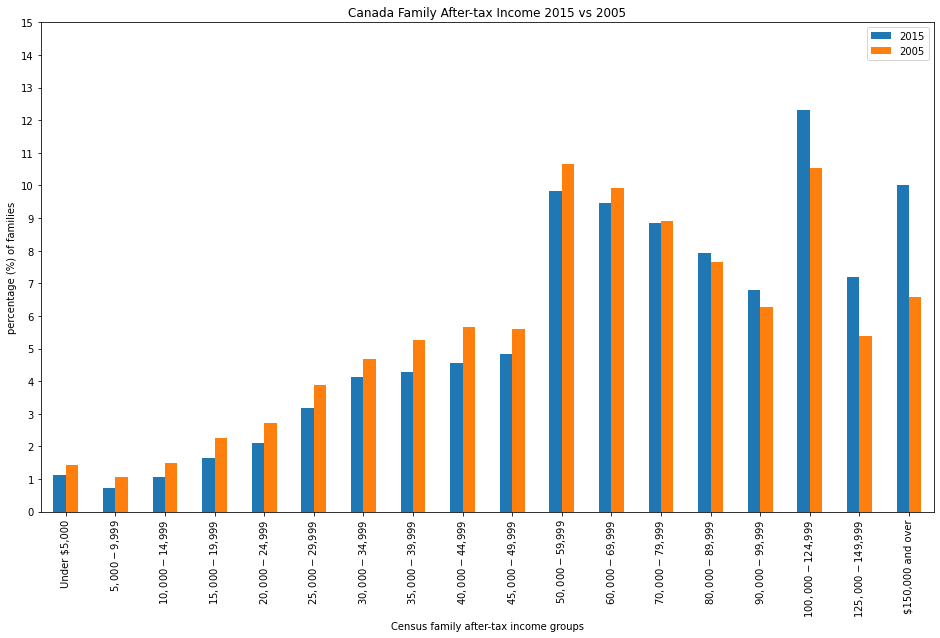

In [9]:
can_income.plot(kind='bar', title='Canada Family After-tax Income 2015 vs 2005', figsize=(16,9), 
                ylabel='percentage (%) of families', yticks=range(16))

### Interpretation of Data
> Notes:
> * family incomes are adjusted (for inflation) to 2015 values
> * median family income in 2005: \$65,209
> * median family income in 2015: \$73,344
>
Since 2005, it appears that overall, Canadian families are making more money.
<br><br>
In 2015, we notice that the proportion of families making less than \$80,000 fell **in all groups**,  and the proportion of families making \$80,000+ rose during this period. This implies a movement from lower income groups to higher income groups. Interestingly, the biggest changes also happened at the upper-most earning groups.

### Limitations
**On average**, families across the country are doing better in 2015 compared to 2005.
<br>
However, since this data combines all regions, differences between regions are hidden (if they exist).
<br>
Family size was also not taken into account, so if family sizes grew or shrank from 2005-2015, the amount of money available per family member may have changed. That being said, according to this external source (at https://www.statista.com/statistics/478948/average-family-size-in-canada/), average family sizes seem to have remained relatively stable during this period.

# Provinces/Territories in 2015

## Description
This section analyzes the data on the level of provinces/territories.
<br>
The focus will be on 2015.

## Summary
* There is a relationship between (after-tax) family income and the province/territory in which the family resides
* British Columbia and Ontario families are fairly average
* Nunavut has more poor, less rich families than average
* Alberta and Yukon have less poor, more rich families than average
* Northwest Territories has an obscene number of families (almost 30%) in the highest income group ($150,000+)
* Alberta, Yukon, and Northwest Territories also have highest median incomes
* Conclusion: Don't work in BC. Move to Northwest Territories.

## Data
This section describes the process by which data were analyzed.

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Obtaining and Reading Data

In [2]:
# The dataset can be downloaded at:
# https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Rp-eng.cfm?TABID=4&LANG=E&A=R&APATH=3&DETAIL=0&DIM=0&FL=A&FREE=0&GC=01&GL=-1&GID=1235625&GK=1&GRP=1&O=D&PID=110237&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2016&THEME=119&VID=0&VNAMEE=&VNAMEF=&D1=0&D2=0&D3=0&D4=0&D5=0&D6=0

This dataset is too large for me to process all at once.
<br>
By looking over the metadata and geo_starting_row_CSV files, we're able to determine that each geographical region spans 52920 rows.
<br>
Therefore, we know that it's safe to break the dataset into chunks of this size to process.

In [3]:
# collect only data for provinces
index_counter = 0
provinces = pd.DataFrame()
for chunk in pd.read_csv('/content/drive/MyDrive/98-400-X2016105_English_CSV_data.csv', chunksize=52920):
  #print(f"{chunk.at[index_counter, 'ALT_GEO_CODE']}, {chunk.iloc[0,3]}")
  #only process 2-digit geo codes
  if chunk.at[index_counter, 'ALT_GEO_CODE'] > 9 and chunk.at[index_counter, 'ALT_GEO_CODE'] < 100:
    print(chunk.iloc[0,3])
    if provinces.empty:
      provinces = chunk
    else:
      provinces = provinces.append(chunk)
  index_counter += 52920

Newfoundland and Labrador
Prince Edward Island
Nova Scotia
New Brunswick
Quebec
Ontario
Manitoba
Saskatchewan
Alberta
British Columbia
Yukon
Northwest Territories
Nunavut


### Creating a Table of Summary Values

In [4]:
# number of rows
provinces.shape[0]

687960

In [5]:
# create a table with the desired summary values
summary = pd.DataFrame()

start_index = 0
for k in range(start_index, provinces.shape[0], 52920):
  p_data = provinces.iloc[k:k+21, [3,19,22]]
  p_data.set_index(p_data['DIM: Census family after-tax income groups (21)'], inplace=True)
  p_data.rename(columns={'Dim: Year (2): Member ID: [1]: 2015 (Note: 2)' : p_data.iat[0,0]}, inplace=True)
  p_data.drop(columns=['DIM: Census family after-tax income groups (21)', 'GEO_NAME'], inplace=True)

  #print(p_data)

  if summary.empty:
    summary = p_data
  else:
    summary[p_data.columns[0]] = p_data

  
summary

,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
DIM: Census family after-tax income groups (21),,,,,,,,,,,,,
Total - After-tax income of census family,161005,41705,270965,222865,2257560,3782540,346165,302255,1114590,1311345,9845,11110,8785
"Under $5,000",735,435,2500,1605,14275,45515,6050,4855,13275,19935,90,105,185
"$5,000 to $9,999",710,265,2055,1260,9665,27755,3560,3010,8135,12955,65,140,240
"$10,000 to $14,999",1735,390,3820,2820,17240,42440,4785,3410,9900,16665,60,175,310
"$15,000 to $19,999",2820,635,5225,4440,35055,64835,6755,4585,13230,24840,115,240,320
"$20,000 to $24,999",3750,890,6470,5470,41430,87245,7515,6040,16345,31475,140,250,385
"$25,000 to $29,999",7045,1650,10520,9570,68400,125990,10285,7470,19900,50880,220,245,430
"$30,000 to $34,999",10020,2190,14525,12440,109270,146365,13660,11360,30135,55810,265,310,385
"$35,000 to $39,999",7990,2260,14265,12460,112030,157355,15010,11280,33365,54825,300,295,405


In [6]:
# remove the unwanted rows
summary.drop(labels=['Total - After-tax income of census family', '$100,000 and over', 'Median after-tax income of census family ($)'], axis='index', inplace=True)
summary

,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
DIM: Census family after-tax income groups (21),,,,,,,,,,,,,
"Under $5,000",735,435,2500,1605,14275,45515,6050,4855,13275,19935,90,105,185
"$5,000 to $9,999",710,265,2055,1260,9665,27755,3560,3010,8135,12955,65,140,240
"$10,000 to $14,999",1735,390,3820,2820,17240,42440,4785,3410,9900,16665,60,175,310
"$15,000 to $19,999",2820,635,5225,4440,35055,64835,6755,4585,13230,24840,115,240,320
"$20,000 to $24,999",3750,890,6470,5470,41430,87245,7515,6040,16345,31475,140,250,385
"$25,000 to $29,999",7045,1650,10520,9570,68400,125990,10285,7470,19900,50880,220,245,430
"$30,000 to $34,999",10020,2190,14525,12440,109270,146365,13660,11360,30135,55810,265,310,385
"$35,000 to $39,999",7990,2260,14265,12460,112030,157355,15010,11280,33365,54825,300,295,405
"$40,000 to $44,999",7515,2370,14840,12660,125920,165935,16070,11630,34965,57065,280,265,365


### Hypothesis Testing Using Chi-Squared Test

***
Now that we've completed our contingency table, let's make a hypothesis to test.
<br><br>
Question: Does the proportion of families in each income group differ across the provinces/territories?
<br><br>
Hypothesis: There is a relationship between the Province/Territory and Family After-tax Income
<br>
Null Hypothesis: There is no relationship between the Province/Territory and Family After-tax Income
<br><br>
alpha value to reject the null hypothesis: 0.05
***

In [7]:
# perform a chi squared test of independence on the contingency table that we generated
# let's use scipy to do this
# c = chi-squared value, p = p-value, df = degrees of freedom, exp = expected values
c, p, df, exp = chi2_contingency(summary)
c, p, df

(322800.30097771797, 0.0, 204)

***
Since the p-value is less than our alpha of 0.05, we can reject the null hypothesis. So, there DOES seem to be a relationship between family income group and province/territory.
***

In [8]:
# trying the same thing out in statsmodels
import statsmodels.api as sm
table = sm.stats.Table(summary)
#print(table.resid_pearson)
rslt = table.test_nominal_association()
print(rslt.pvalue)
#print(table.chi2_contribs)

0.0


In [9]:
pd.DataFrame(table.resid_pearson)
#pd.DataFrame(table.chi2_contribs)

,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
DIM: Census family after-tax income groups (21),,,,,,,,,,,,,
"Under $5,000",-24.978778,-1.360395,-9.407976,-17.592433,-68.495883,16.582895,35.375476,25.682739,7.774144,44.155800,-1.863133,-1.685207,8.800402
"$5,000 to $9,999",-12.790269,-1.794950,3.025370,-8.077156,-50.185676,5.615789,22.281292,18.693012,2.559587,37.858758,-0.571541,6.885663,22.484076
"$10,000 to $14,999",0.909935,-2.369758,18.021935,9.701136,-42.529433,12.825557,18.795738,3.955792,-17.074828,24.149458,-4.290500,5.340874,22.563827
"$15,000 to $19,999",2.933064,-2.137431,10.955764,12.277746,-12.204051,8.569264,13.439421,-5.997377,-38.572178,21.071087,-3.759619,4.110251,14.431650
"$20,000 to $24,999",6.120401,0.371719,10.045069,11.273605,-28.197865,26.647712,2.567370,-4.140400,-46.624973,23.078405,-4.673333,1.028315,14.663063
"$25,000 to $29,999",26.990743,8.934127,20.613213,29.593625,-12.377897,16.826938,-6.782555,-21.754611,-82.407698,45.188756,-5.228832,-5.751999,9.010867
"$30,000 to $34,999",41.251669,11.230403,31.424431,33.634810,52.250993,-25.223462,-5.412180,-10.135923,-74.231816,6.913423,-7.018081,-6.970415,1.127033
"$35,000 to $39,999",13.096699,11.169060,24.585117,29.731788,49.039952,-11.893645,1.406199,-14.731506,-65.940561,-5.855666,-5.921915,-8.313277,1.441442
"$40,000 to $44,999",1.798128,10.613094,22.035892,24.480312,70.699987,-16.802346,1.947222,-18.614239,-70.833729,-11.782398,-7.999215,-10.785875,-1.848820


### Differences in Income Distribution

In [10]:
# create a table of the proportion of families in each income group (in percent)
distr = summary.iloc[:] / summary[:].sum() * 100
distr['Average'] = distr.T.mean()
distr

,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut,Average
DIM: Census family after-tax income groups (21),,,,,,,,,,,,,,
"Under $5,000",0.456493,1.043040,0.922628,0.720135,0.632317,1.203295,1.747747,1.606233,1.191026,1.520183,0.915099,0.944669,2.103468,1.154333
"$5,000 to $9,999",0.440966,0.635415,0.758401,0.565339,0.428115,0.733768,1.028426,0.995831,0.729868,0.987909,0.660905,1.259559,2.728823,0.919487
"$10,000 to $14,999",1.077573,0.935140,1.409776,1.265283,0.763653,1.122000,1.382309,1.128168,0.888223,1.270823,0.610066,1.574449,3.524730,1.304015
"$15,000 to $19,999",1.751444,1.522599,1.928293,1.992148,1.552776,1.714064,1.951410,1.516906,1.186989,1.894224,1.169293,2.159244,3.638431,1.844448
"$20,000 to $24,999",2.329048,2.134037,2.387762,2.454291,1.835159,2.306525,2.170961,1.998280,1.466465,2.400189,1.423488,2.249213,4.377487,2.271762
"$25,000 to $29,999",4.375505,3.956360,3.882420,4.293887,3.029806,3.330839,2.971169,2.471382,1.785418,3.879956,2.236909,2.204229,4.889142,3.331309
"$30,000 to $34,999",6.223216,5.251169,5.360471,5.581604,4.840160,3.869500,3.946152,3.758354,2.703697,4.255903,2.694459,2.789024,4.377487,4.280861
"$35,000 to $39,999",4.962425,5.419015,5.264518,5.590578,4.962415,4.160046,4.336145,3.731886,2.993491,4.180790,3.050330,2.654071,4.604889,4.300815
"$40,000 to $44,999",4.667412,5.682772,5.476722,5.680314,5.577679,4.386879,4.642362,3.847681,3.137042,4.351606,2.846975,2.384166,4.150085,4.371669


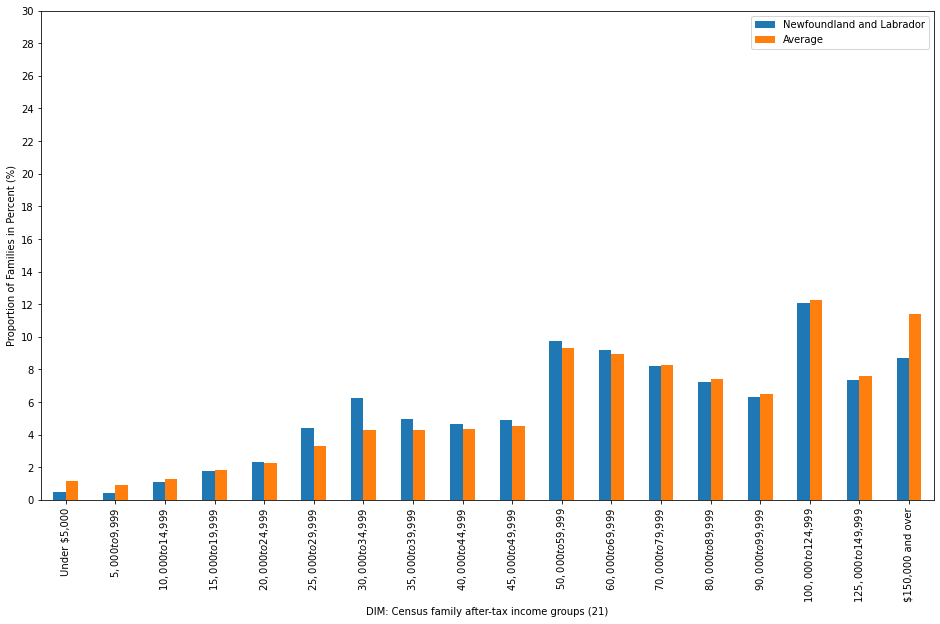

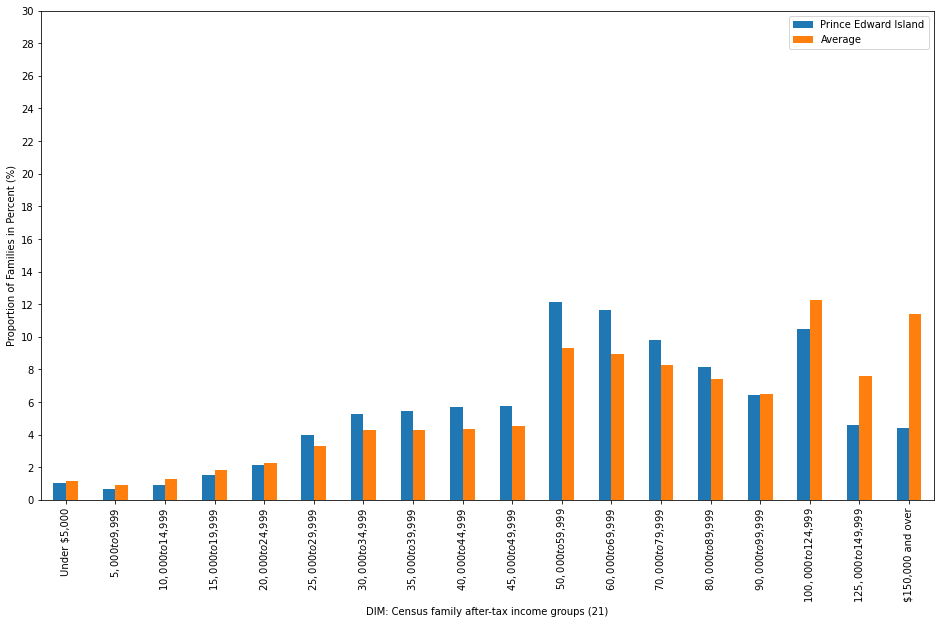

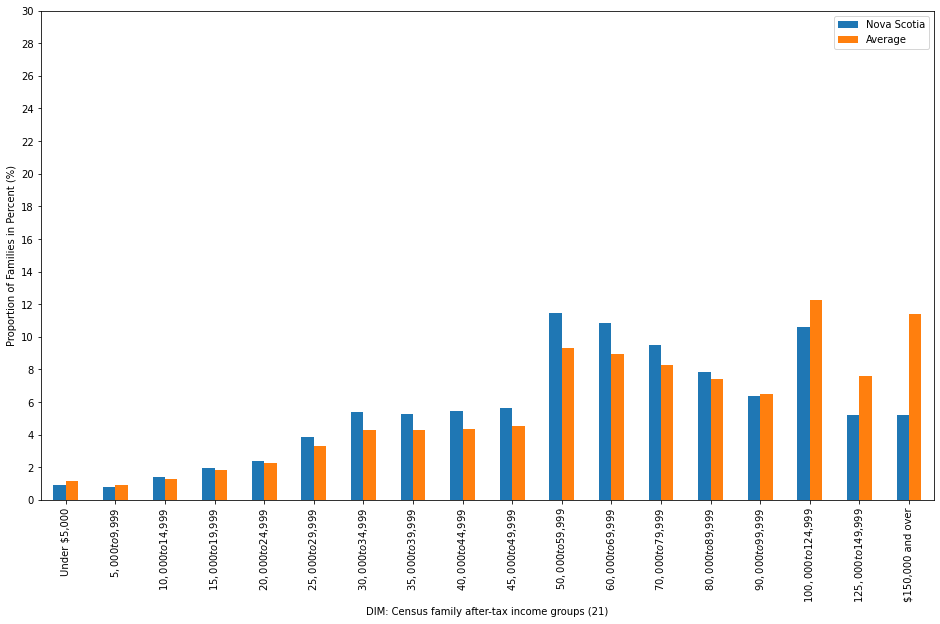

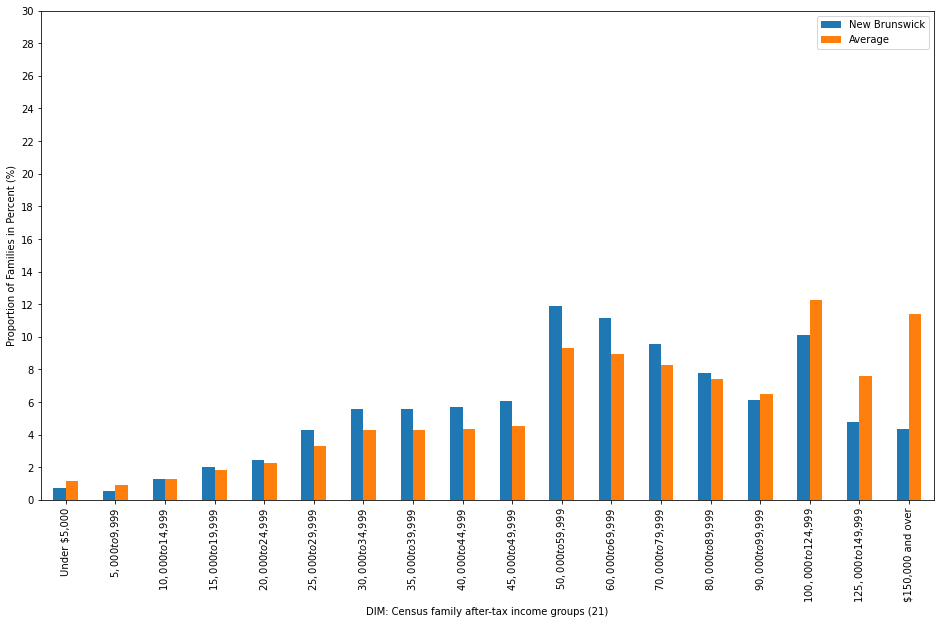

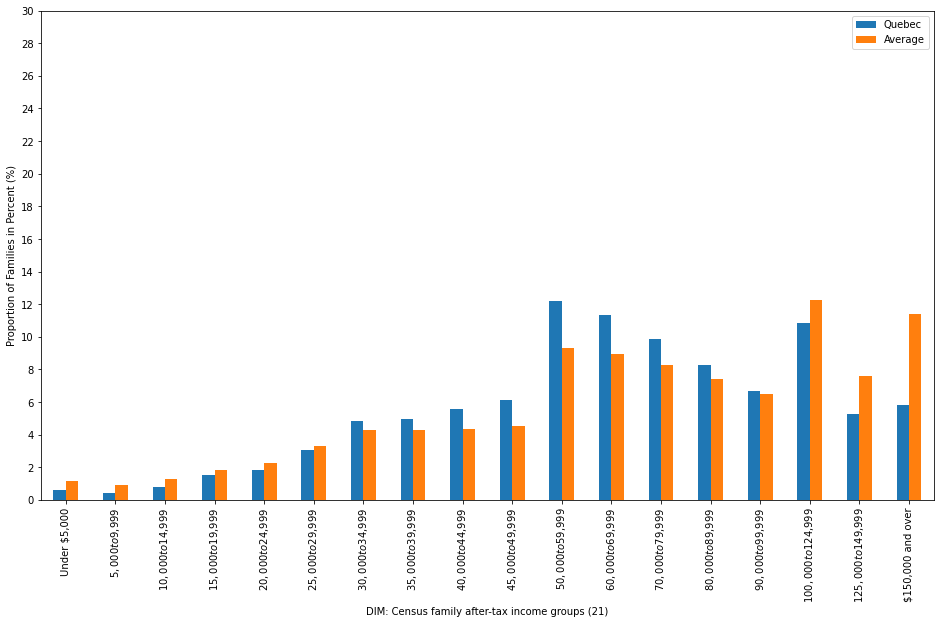

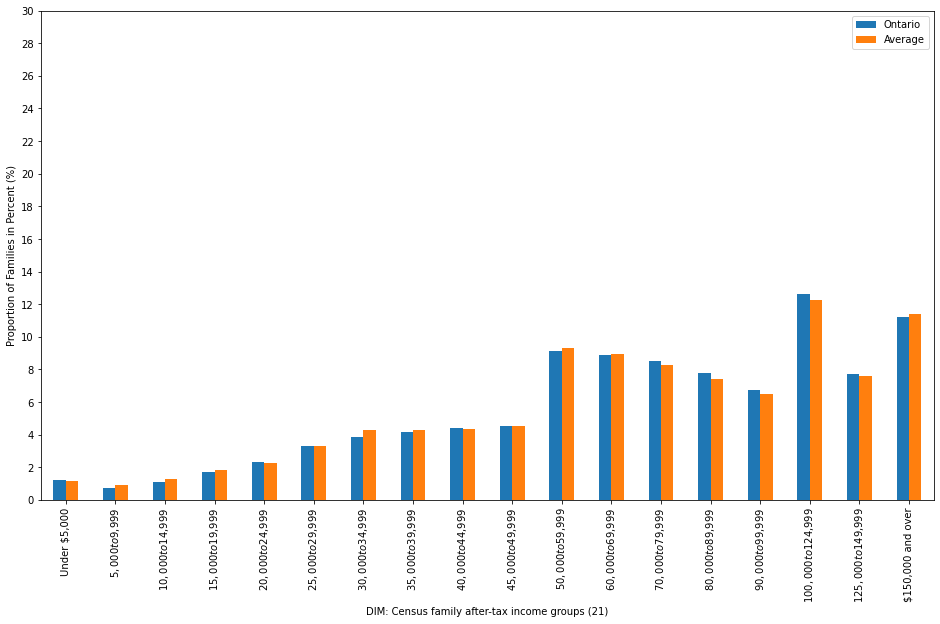

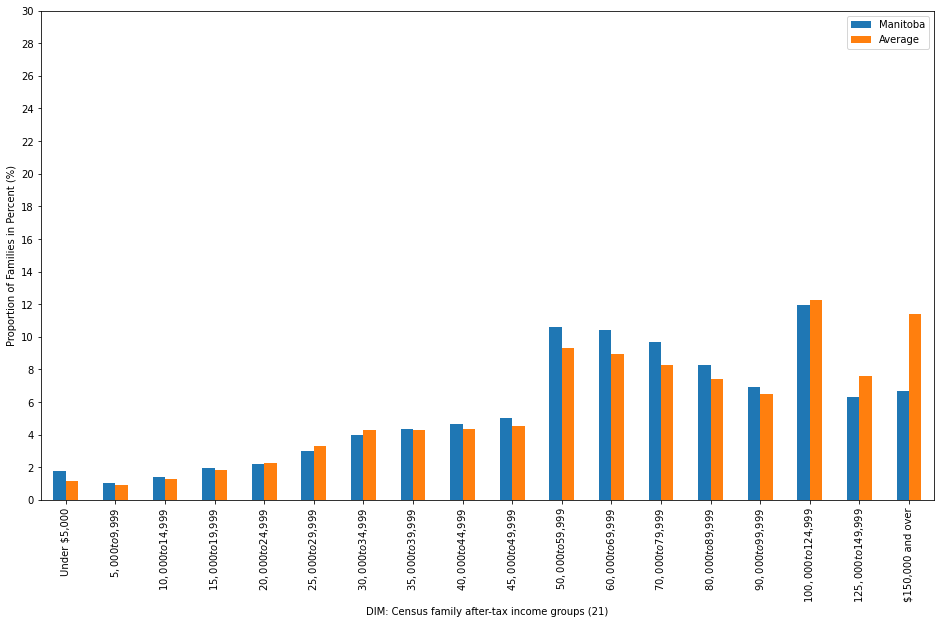

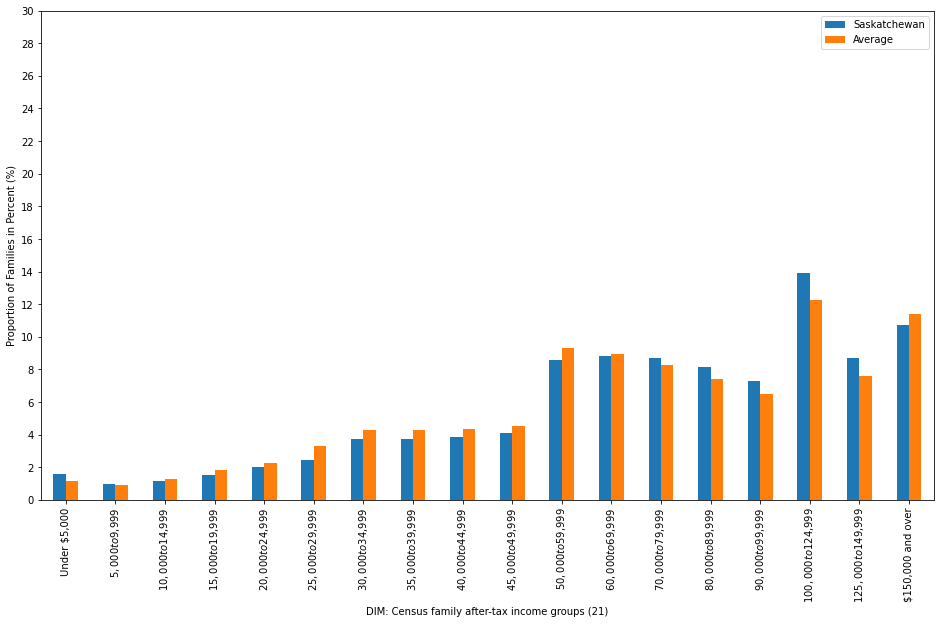

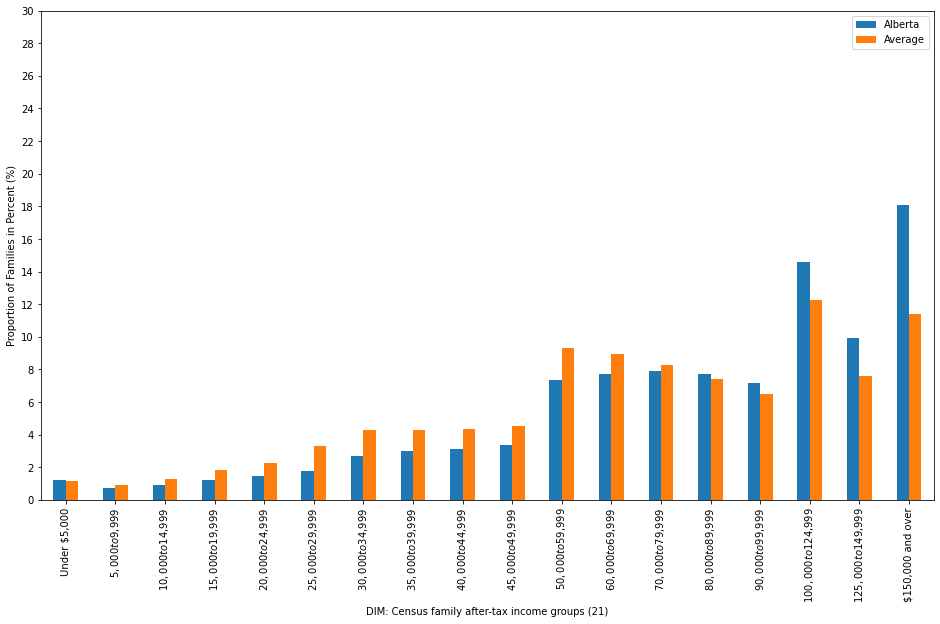

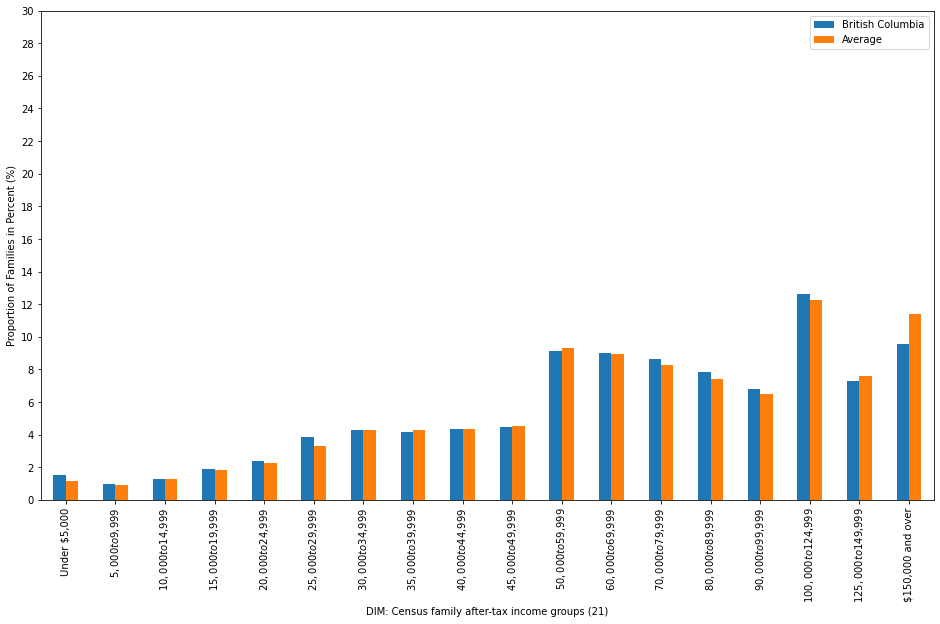

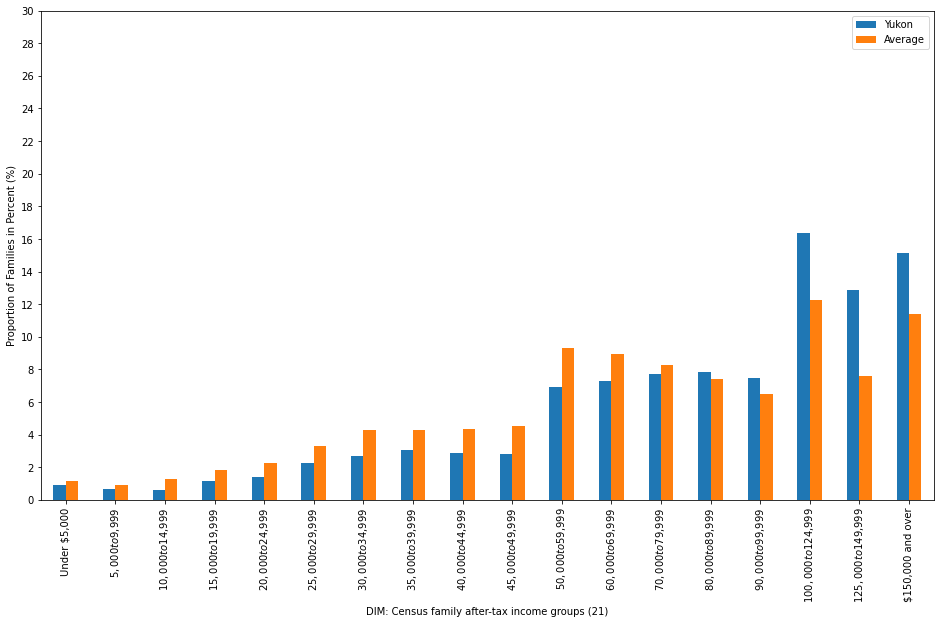

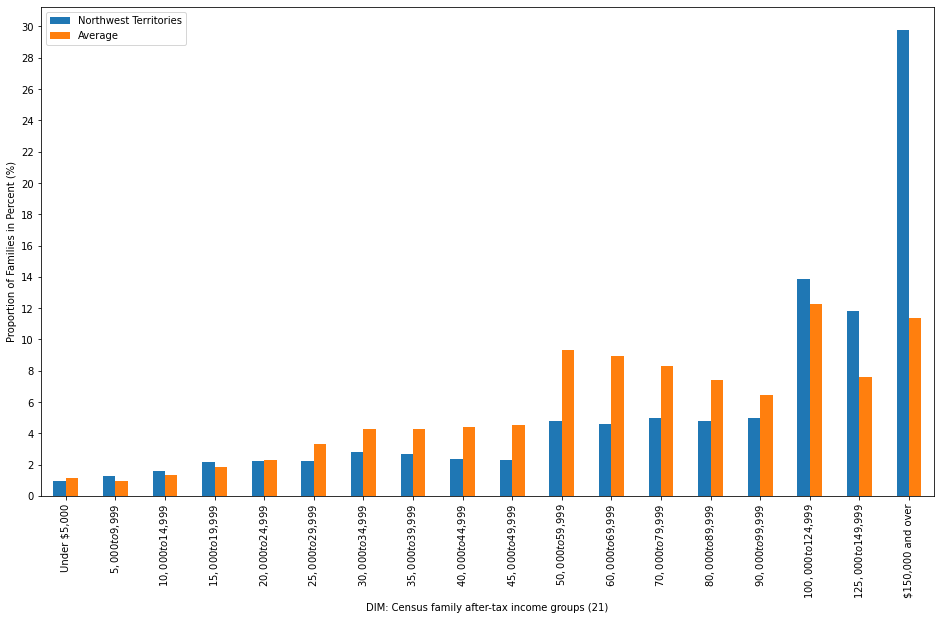

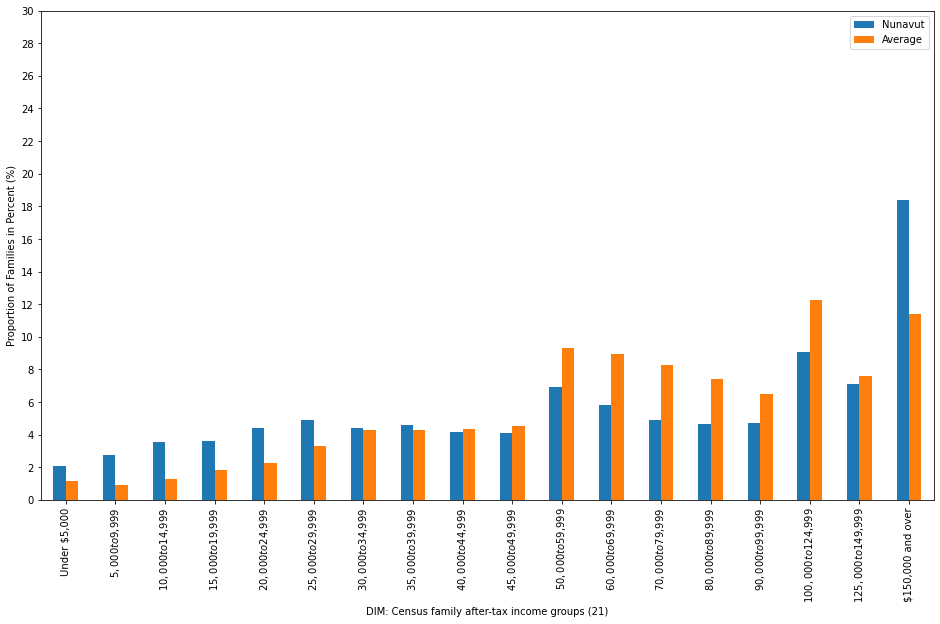

In [11]:
for k in range(len(distr.columns)-1):
  distr.iloc[:, [k,-1]].plot(kind='bar',figsize=(16,9), yticks=range(0,31,2), ylabel='Proportion of Families in Percent (%)')

We can observe that there is a general "shape" of the distribution of family incomes (see the average). I expected to see a smooth, normal distribution. One likely reason that this was not the case is because of the dataset's use of uneven bucket sizes (i.e. +5,+5,...,+10,+10,...+25,+25,...).

### Regions' Divergence from the Average

#### Simple Difference

In [12]:
# make a copy of the distribution of family incomes table from the previous section
diff = pd.DataFrame.copy(distr)
print(diff['Average'][0], diff['Average'][1])

1.1543334372962772 0.9194867196190635


In [13]:
# replace each cell with the difference between the average and actual values
for k in range(0,len(diff.index)):
  diff.iloc[k] = diff.iloc[k,:-1] - diff.iat[k,-1]

diff.drop(columns='Average', inplace=True)
diff

,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
DIM: Census family after-tax income groups (21),,,,,,,,,,,,,
"Under $5,000",-0.697840,-0.111293,-0.231705,-0.434199,-0.522016,0.048962,0.593413,0.451900,0.036693,0.365850,-0.239234,-0.209664,0.949134
"$5,000 to $9,999",-0.478520,-0.284071,-0.161086,-0.354147,-0.491372,-0.185719,0.108939,0.076345,-0.189619,0.068423,-0.258582,0.340072,1.809336
"$10,000 to $14,999",-0.226442,-0.368875,0.105761,-0.038732,-0.540362,-0.182014,0.078294,-0.175847,-0.415792,-0.033192,-0.693949,0.270434,2.220715
"$15,000 to $19,999",-0.093004,-0.321849,0.083845,0.147700,-0.291672,-0.130383,0.106962,-0.327542,-0.657459,0.049776,-0.675154,0.314796,1.793983
"$20,000 to $24,999",0.057286,-0.137725,0.116000,0.182529,-0.436603,0.034763,-0.100800,-0.273482,-0.805297,0.128427,-0.848274,-0.022549,2.105725
"$25,000 to $29,999",1.044195,0.625051,0.551111,0.962577,-0.301503,-0.000470,-0.360140,-0.859927,-1.545892,0.548647,-1.094400,-1.127081,1.557832
"$30,000 to $34,999",1.942355,0.970308,1.079610,1.300743,0.559299,-0.411361,-0.334709,-0.522507,-1.577164,-0.024958,-1.586403,-1.491837,0.096626
"$35,000 to $39,999",0.661609,1.118199,0.963702,1.289762,0.661600,-0.140769,0.035330,-0.568929,-1.307324,-0.120025,-1.250485,-1.646744,0.304074
"$40,000 to $44,999",0.295743,1.311103,1.105053,1.308645,1.206010,0.015210,0.270693,-0.523988,-1.234627,-0.020063,-1.524694,-1.987503,-0.221583


In [14]:
diff.describe()

,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,-4.934325e-16,-3.454027e-16,-3.947460e-16,-3.454027e-16,-2.467162e-16,-5.181041e-16,-3.454027e-16,-2.960595e-16,-2.960595e-16,-2.467162e-16,-3.947460e-16,-1.973730e-16,-1.480297e-16
std,9.063522e-01,2.239491e+00,1.898086e+00,2.219167e+00,1.904596e+00,2.112221e-01,1.362043e+00,7.060214e-01,2.067544e+00,5.203266e-01,2.188206e+00,5.056446e+00,2.618918e+00
min,-2.699950e+00,-6.994678e+00,-6.186398e+00,-7.025939e+00,-5.575069e+00,-4.113611e-01,-4.710871e+00,-8.599272e-01,-1.919593e+00,-1.851278e+00,-2.383144e+00,-4.528895e+00,-3.409004e+00
25%,-2.123619e-01,-3.124043e-01,-1.474463e-01,-3.564911e-01,-5.143552e-01,-1.430924e-01,-2.344647e-01,-5.236178e-01,-1.234263e+00,-5.545586e-02,-1.456141e+00,-2.191181e+00,-2.206851e+00
50%,-9.489757e-02,3.007684e-01,2.821506e-01,2.814228e-01,-3.742160e-02,-3.656395e-03,1.079507e-01,-2.246646e-01,-5.366254e-01,3.063127e-02,-6.845516e-01,-1.309459e+00,-6.247872e-02
75%,3.318913e-01,1.198609e+00,1.084278e+00,1.297998e+00,1.115864e+00,1.034795e-01,5.589926e-01,4.413222e-01,2.468805e-01,3.504709e-01,2.554757e-01,3.037059e-01,1.734945e+00
max,1.942355e+00,2.835611e+00,2.143365e+00,2.613037e+00,2.908154e+00,3.994635e-01,1.440244e+00,1.649898e+00,6.697182e+00,5.486468e-01,5.251091e+00,1.839694e+01,6.980065e+00


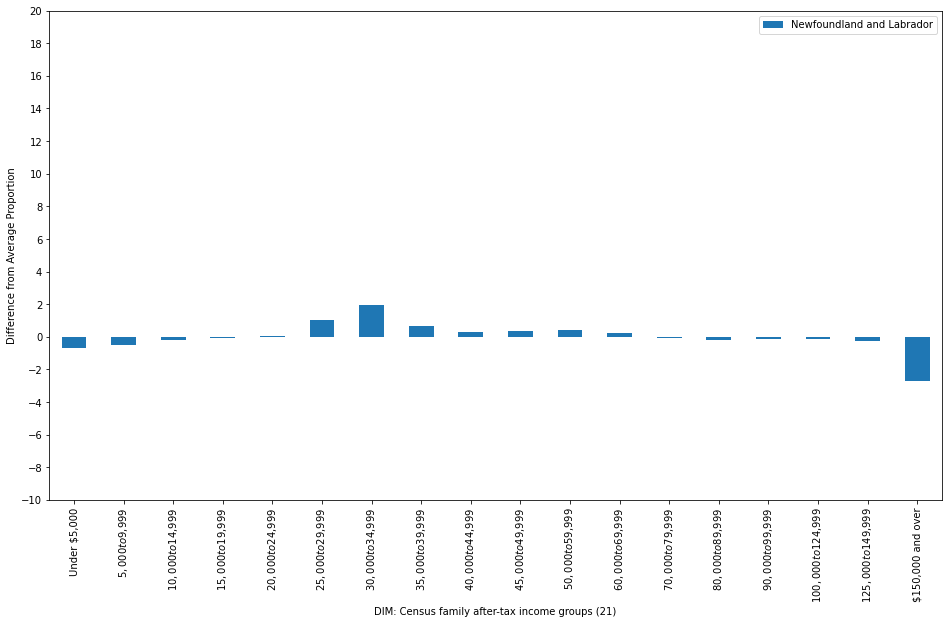

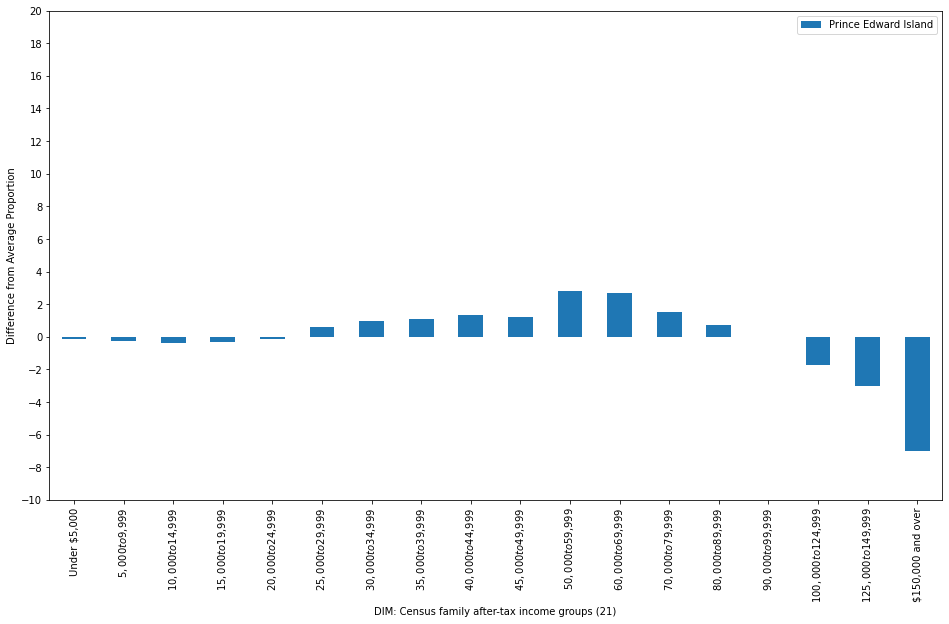

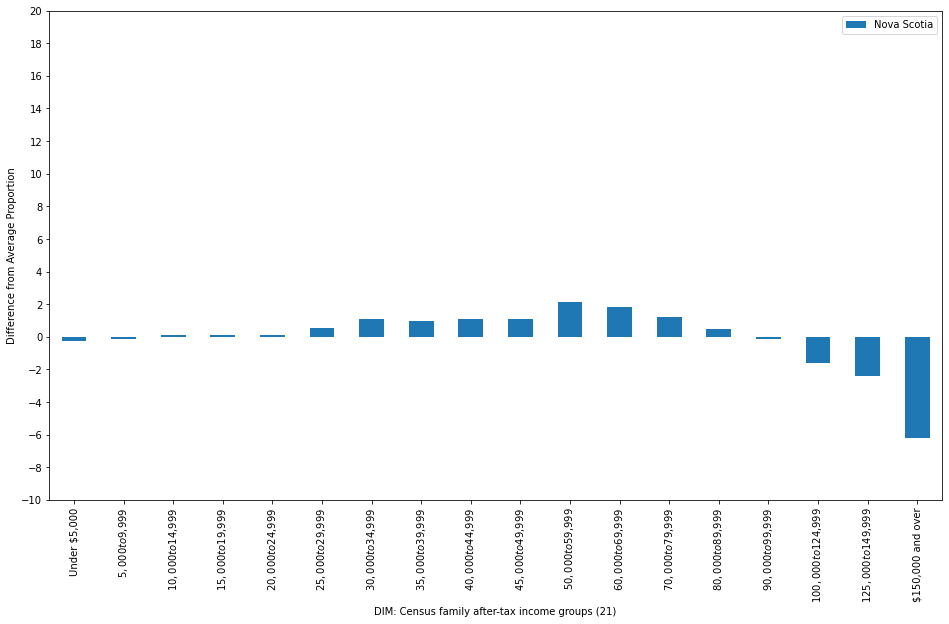

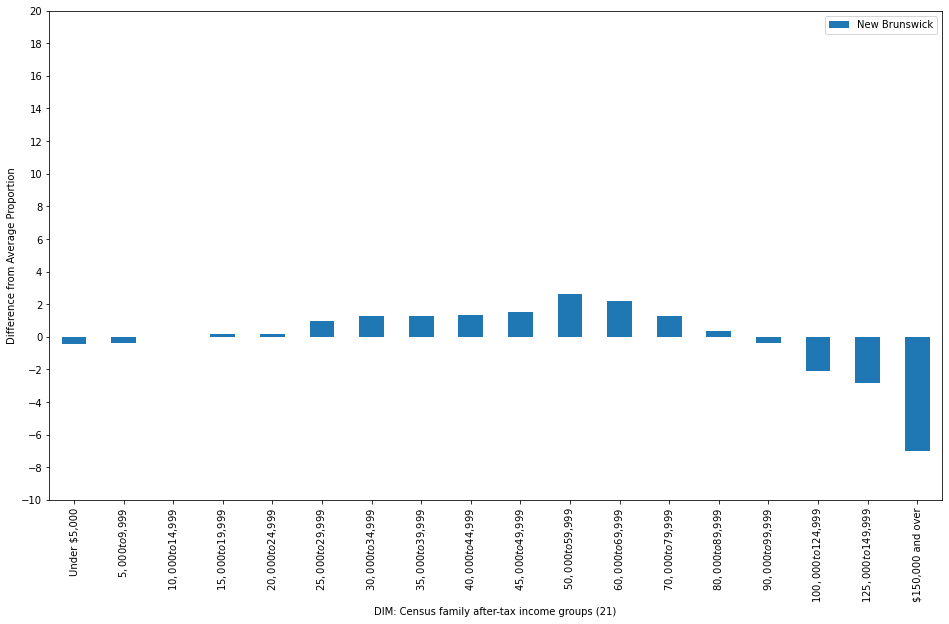

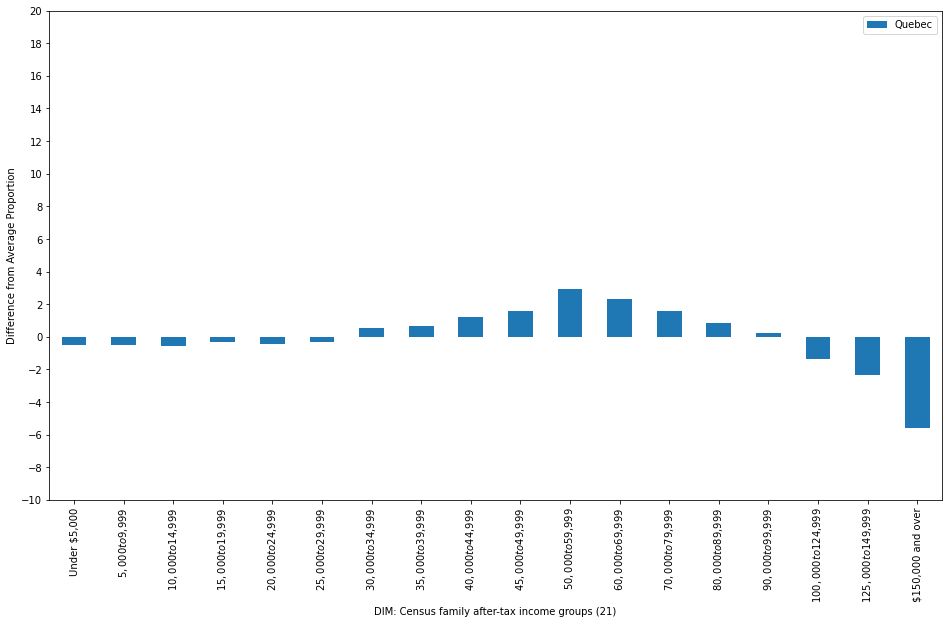

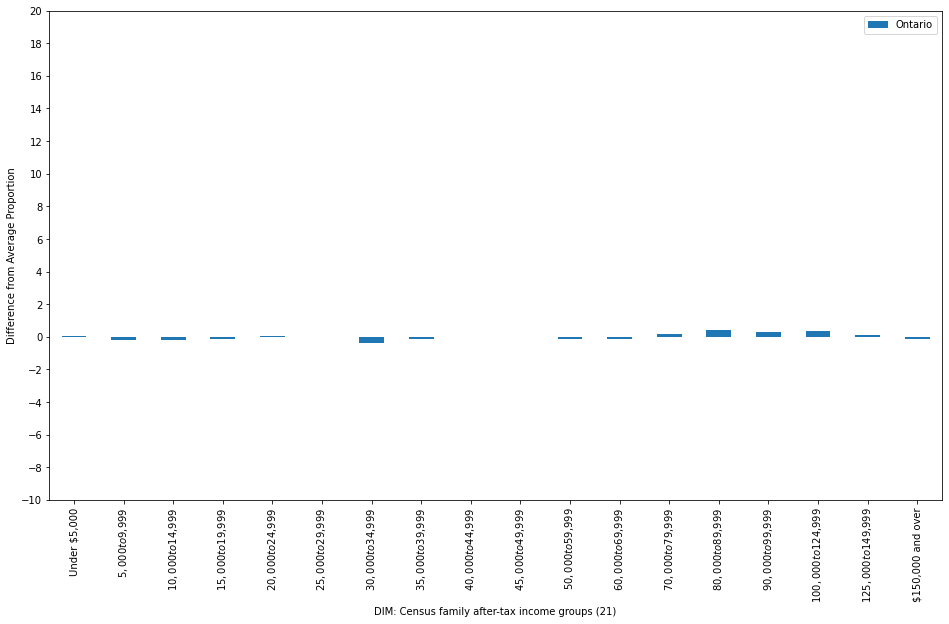

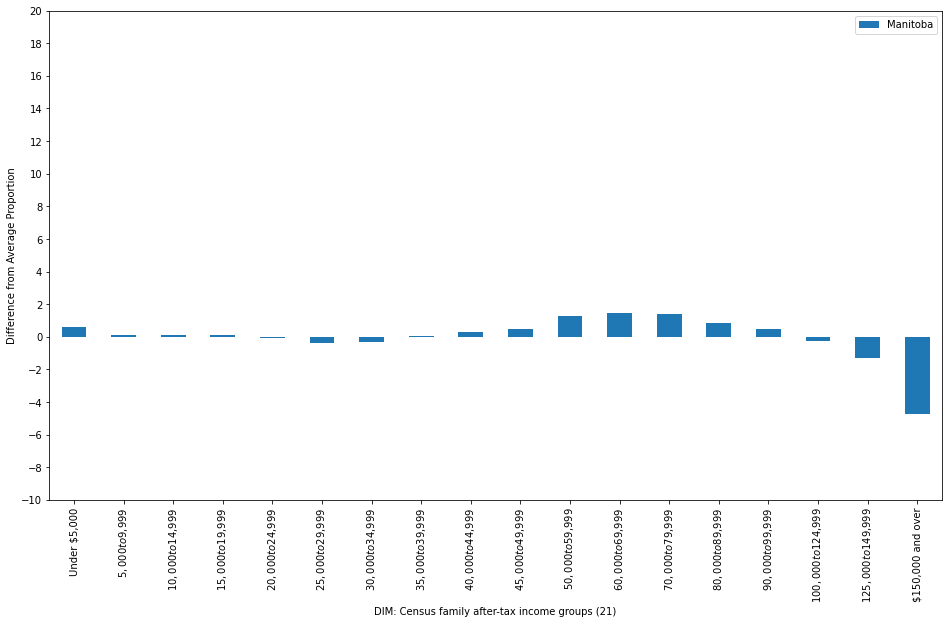

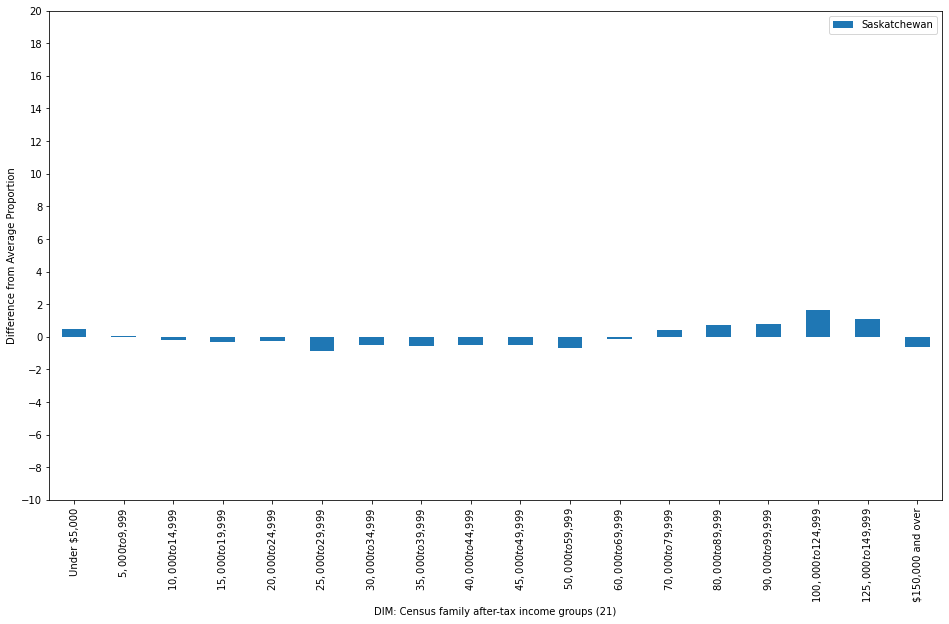

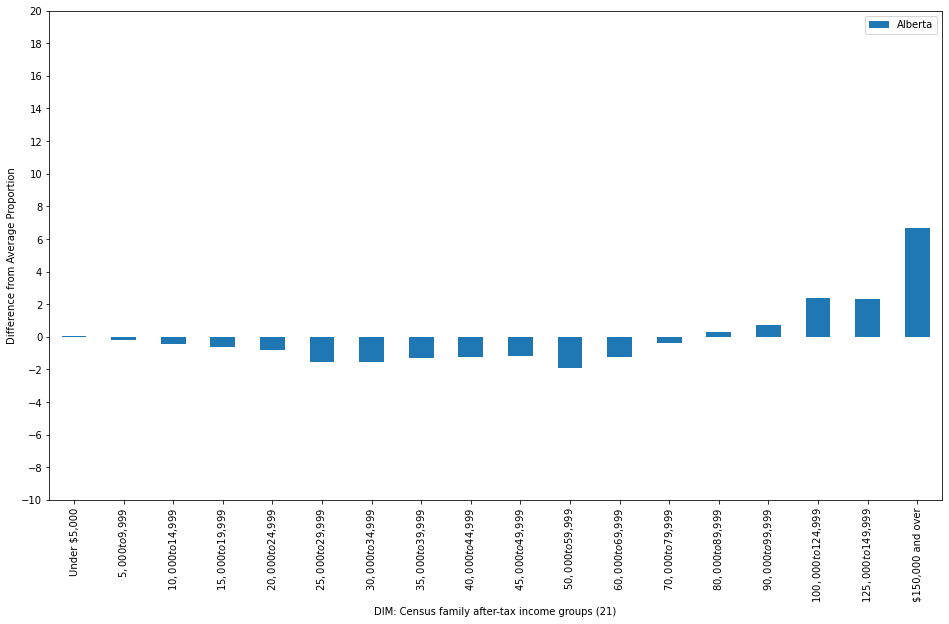

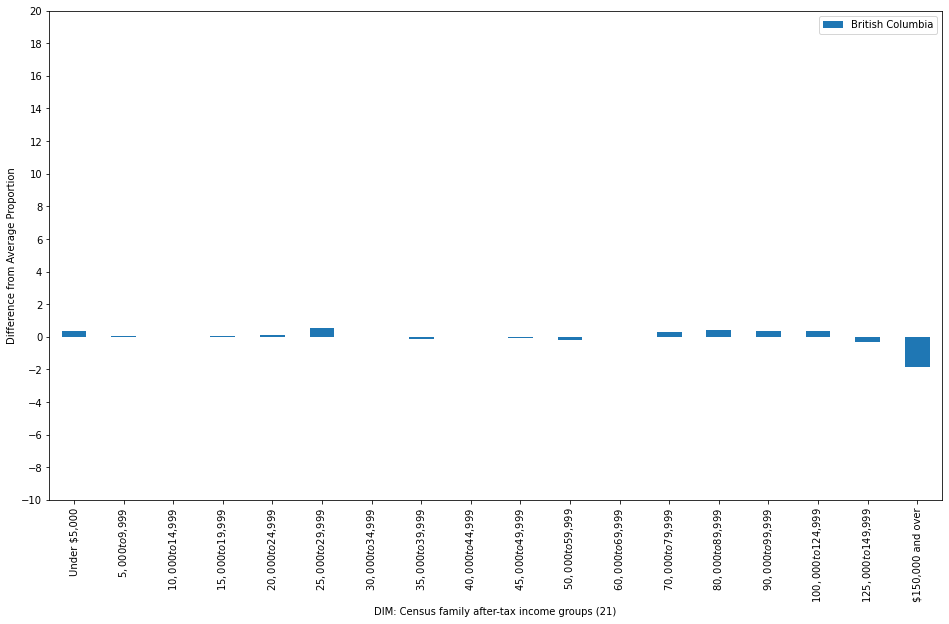

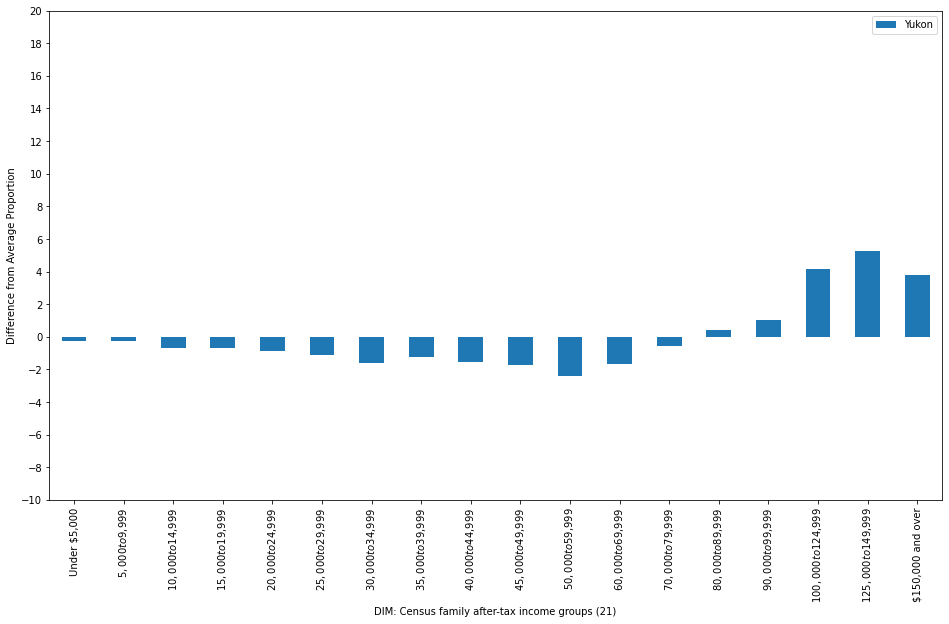

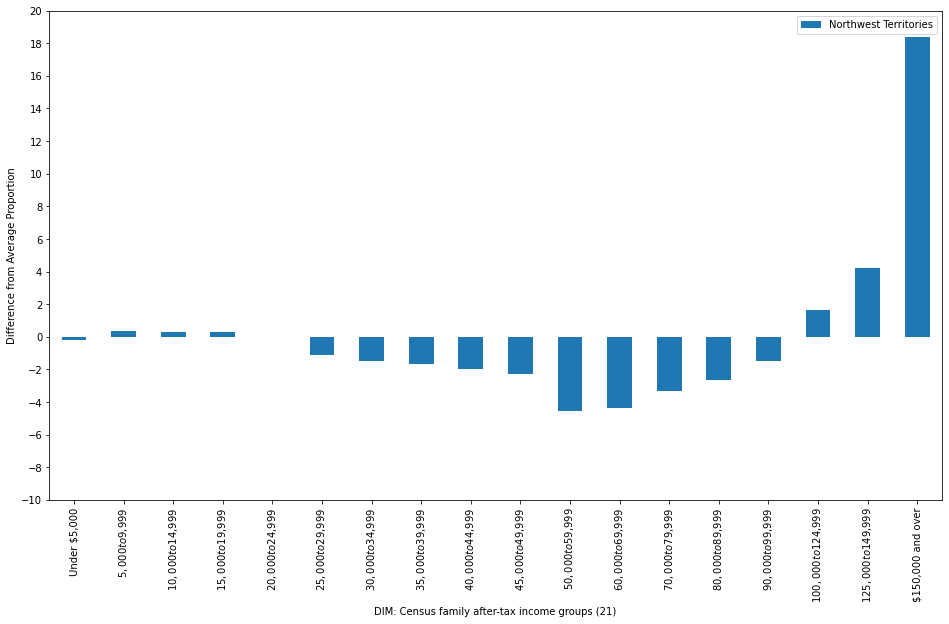

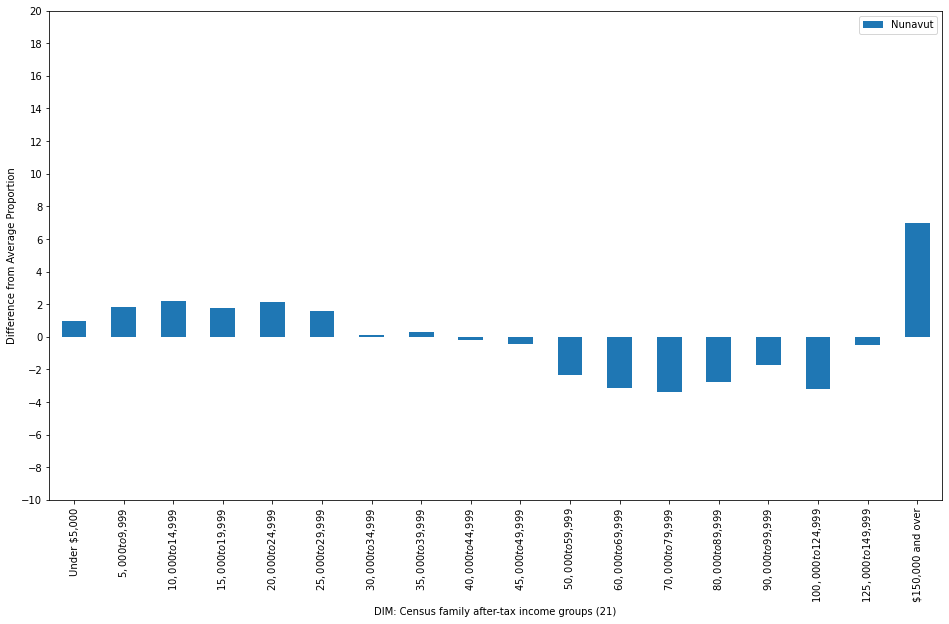

In [15]:
# plot the graphs
regions_per_group = 1
for k in range(0,len(diff.columns),regions_per_group):
  diff.iloc[:, k:k+regions_per_group].plot(kind='bar',figsize=(16,9), yticks=range(-10,22,2), ylabel='Difference from Average Proportion')

Note that the graphs show the simple differences between the average and the actual percentages of families in each income group.
Here is an example to illustrate:
> The average % of families in the Under \$5,000 group is ~1.15%
> <br>
> The % of families in Nunavut in the Under \$5,000 group is ~2.10%
> <br> 
> 2.10% - 1.15% = 0.95%
> <br>
> Nunavut is above the average province/territoy for proportion of families in the Under \$5,000 group by a value of 0.95%.
>
The reason why a simple difference was used instead of a proportional difference (i.e. Nunavut has +82.6% more families in the Under \$5,000 group than the average) is to keep the focus on the overall proportions of families in each group.

***
Summary of Observations:
<br>
NL, MB, BC- close to average, a little less super rich
<br>
PE, NS, NB, QC - less high income
<br>
ON, SK - average
<br>
AB, YT, NT - less of everything, more rich ppl
<br>
NU - more poor, less rich in general, but more super rich

#### Proportional Difference

In [16]:
pdiff = pd.DataFrame.copy(diff.T / distr['Average'] * 100)
pdiff

DIM: Census family after-tax income groups (21),"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 and over"
Newfoundland and Labrador,-60.453941,-52.042113,-17.364987,-5.042367,2.521656,31.344888,45.372991,15.383347,6.764996,7.553705,4.579560,2.686006,-1.166421,-2.296209,-2.055088,-1.196115,-3.547123,-23.719895
Prince Edward Island,-9.641325,-30.894552,-28.287650,-17.449592,-6.062483,18.762914,22.666181,25.999702,29.990907,26.912806,30.499540,29.918532,18.038288,10.038023,-0.363902,-14.384138,-39.512775,-61.450395
Nova Scotia,-20.072628,-17.519142,8.110441,4.545831,5.106187,16.543370,25.219452,22.407431,25.277609,23.847341,23.053816,20.593967,14.298069,6.050922,-1.648612,-13.216230,-31.704166,-54.349407
New Brunswick,-37.614680,-38.515771,-2.970180,8.007829,8.034674,28.894863,30.385074,29.988787,29.934686,32.881990,28.105555,24.329839,15.142394,5.133313,-5.529169,-17.183705,-36.893241,-61.725032
Quebec,-45.222322,-53.439764,-41.438322,-15.813516,-19.218688,-9.050586,13.065100,15.383130,27.586946,35.047747,31.279797,26.061222,18.959772,11.411111,3.355658,-11.263001,-31.099186,-48.978696
Ontario,4.241557,-20.198071,-13.958006,-7.068969,1.530228,-0.014109,-9.609308,-3.273077,0.347919,-0.150283,-1.564073,-1.286812,2.236578,5.391741,4.677923,2.895313,1.598343,-1.263915
Manitoba,51.407440,11.847854,6.004068,5.799130,-4.437105,-10.810764,-7.818733,0.821468,6.191987,9.950753,13.941155,16.056803,16.989257,11.341552,7.052917,-2.279793,-17.124364,-41.386447
Saskatchewan,39.148100,8.302968,-13.485047,-17.758261,-12.038332,-25.813488,-12.205662,-13.228396,-11.985994,-10.482786,-7.514811,-1.592521,4.935920,9.963245,12.514566,13.480875,14.320899,-5.740912
Alberta,3.178702,-20.622228,-31.885516,-35.645299,-35.448115,-46.404922,-36.842220,-30.397131,-28.241543,-25.872027,-20.646939,-13.748203,-4.876082,4.277925,11.115088,19.329761,30.663255,58.836807
British Columbia,31.693605,7.441405,-2.545362,2.698698,5.653201,16.469404,-0.583012,-2.790755,-0.458931,-1.380923,-1.988723,0.128059,3.769461,5.732344,5.618268,2.997488,-4.502603,-16.264049


In [17]:
pdiff = pdiff.T
pdiff

,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
DIM: Census family after-tax income groups (21),,,,,,,,,,,,,
"Under $5,000",-60.453941,-9.641325,-20.072628,-37.614680,-45.222322,4.241557,51.407440,39.148100,3.178702,31.693605,-20.724887,-18.163216,82.223594
"$5,000 to $9,999",-52.042113,-30.894552,-17.519142,-38.515771,-53.439764,-20.198071,11.847854,8.302968,-20.622228,7.441405,-28.122406,36.985030,196.776793
"$10,000 to $14,999",-17.364987,-28.287650,8.110441,-2.970180,-41.438322,-13.958006,6.004068,-13.485047,-31.885516,-2.545362,-53.216322,20.738577,170.298305
"$15,000 to $19,999",-5.042367,-17.449592,4.545831,8.007829,-15.813516,-7.068969,5.799130,-17.758261,-35.645299,2.698698,-36.604694,17.067245,97.263965
"$20,000 to $24,999",2.521656,-6.062483,5.106187,8.034674,-19.218688,1.530228,-4.437105,-12.038332,-35.448115,5.653201,-37.339931,-0.992581,92.691289
"$25,000 to $29,999",31.344888,18.762914,16.543370,28.894863,-9.050586,-0.014109,-10.810764,-25.813488,-46.404922,16.469404,-32.851959,-33.832969,46.763358
"$30,000 to $34,999",45.372991,22.666181,25.219452,30.385074,13.065100,-9.609308,-7.818733,-12.205662,-36.842220,-0.583012,-37.058025,-34.849001,2.257163
"$35,000 to $39,999",15.383347,25.999702,22.407431,29.988787,15.383130,-3.273077,0.821468,-13.228396,-30.397131,-2.790755,-29.075531,-38.289118,7.070143
"$40,000 to $44,999",6.764996,29.990907,25.277609,29.934686,27.586946,0.347919,6.191987,-11.985994,-28.241543,-0.458931,-34.876697,-45.463262,-5.068624


In [18]:
pdiff.describe()

,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,-2.926506,0.265560,3.141347,2.244846,-5.187422,-1.970390,4.085954,-1.621091,-11.290483,2.871532,-13.485762,-6.284970,30.157385
std,24.898144,27.811404,22.488180,29.420258,29.588531,6.769290,18.500328,15.716653,27.804937,9.746875,32.405596,52.937265,72.236291
min,-60.453941,-61.450395,-54.349407,-61.725032,-53.439764,-20.198071,-41.386447,-25.813488,-46.404922,-16.264049,-53.216322,-49.614306,-41.081514
25%,-4.668556,-16.683229,-10.324325,-14.270071,-28.129061,-2.845826,-3.897777,-12.163830,-31.513420,-1.836773,-36.172695,-39.849020,-25.957106
50%,-1.181268,4.837060,7.080682,8.021252,-2.847464,-0.082196,6.098028,-6.627861,-20.634584,1.413378,-26.877628,-28.626625,-1.405731
75%,6.218637,25.166322,21.954065,28.697536,18.065612,2.077019,11.721278,9.548176,4.003119,5.644468,2.536353,16.102112,76.998200
max,45.372991,30.499540,25.277609,32.881990,35.047747,5.391741,51.407440,39.148100,58.836807,31.693605,68.992224,161.622740,196.776793


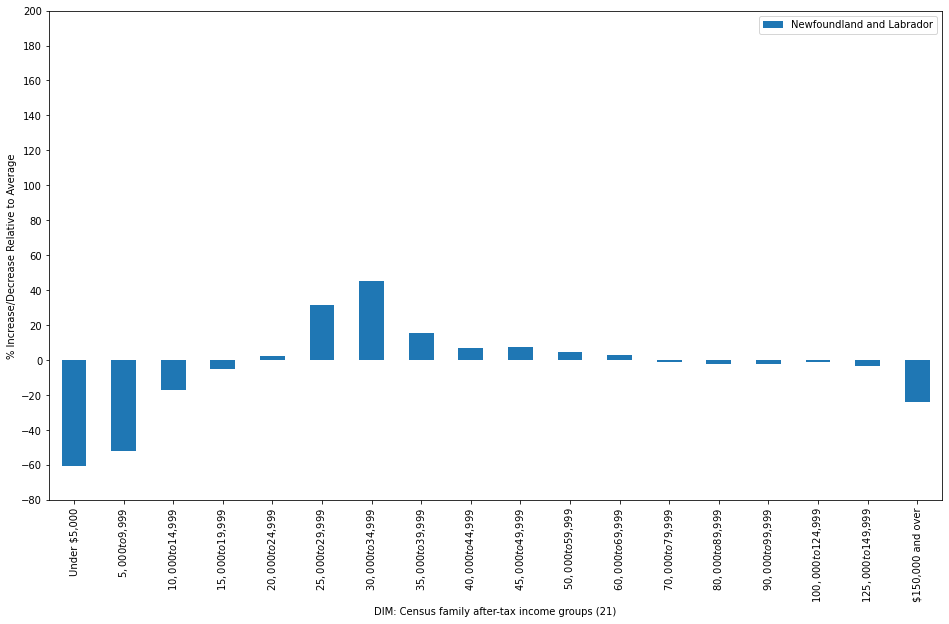

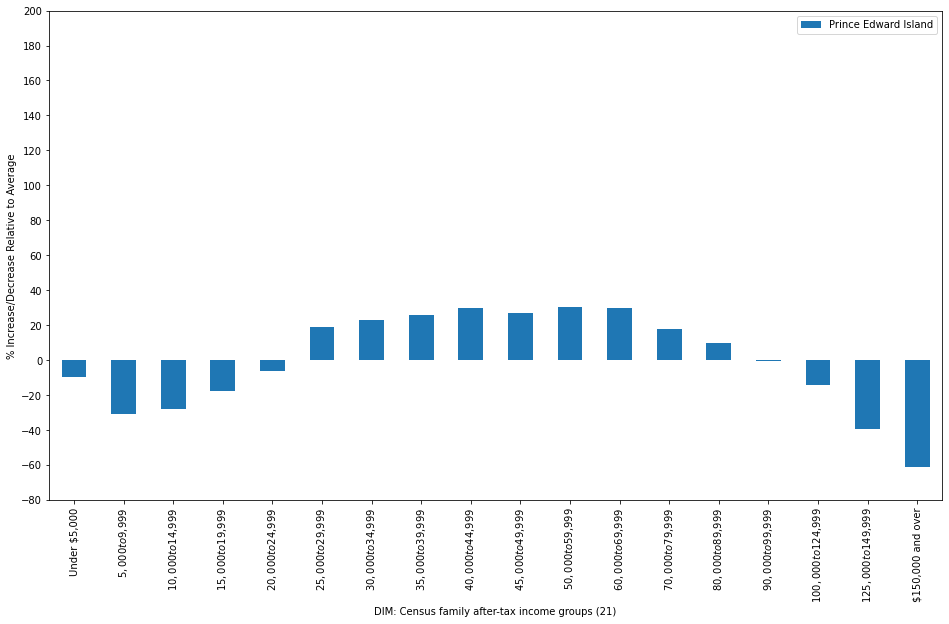

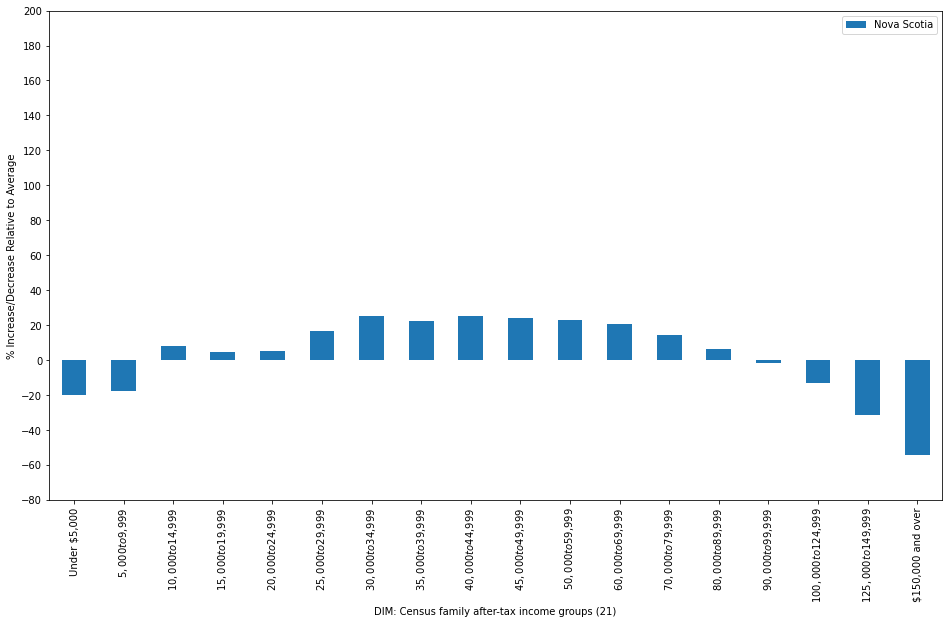

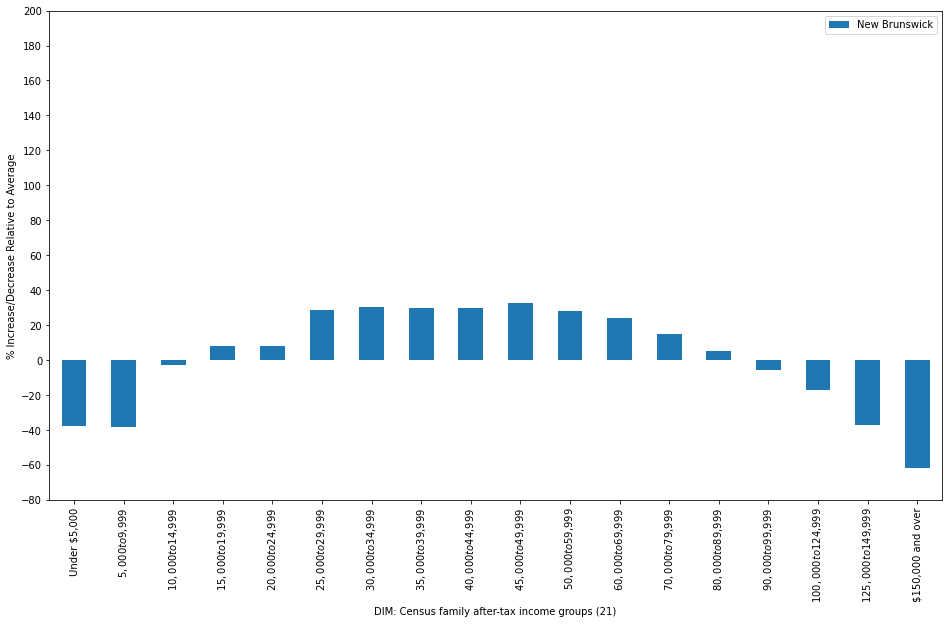

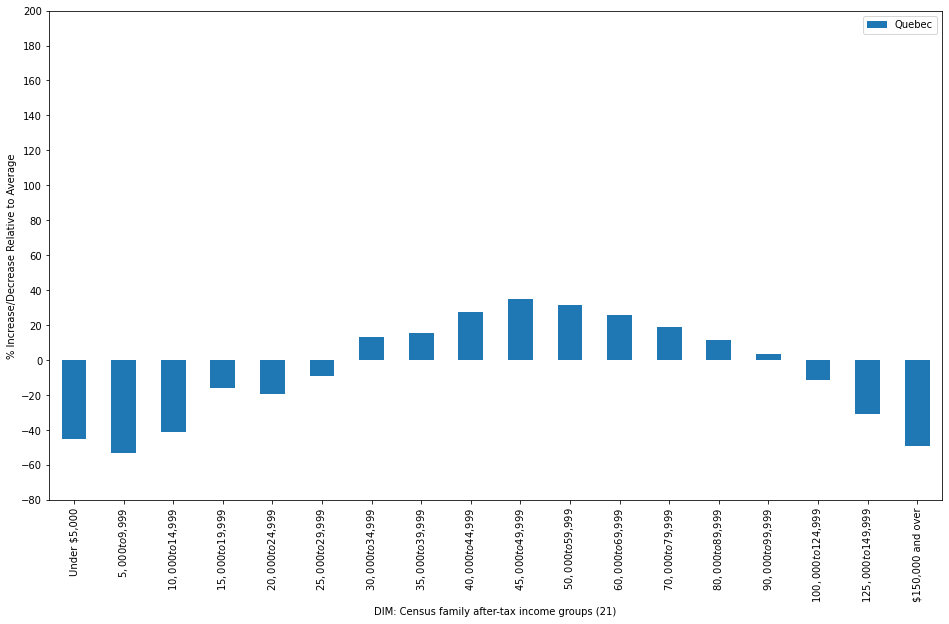

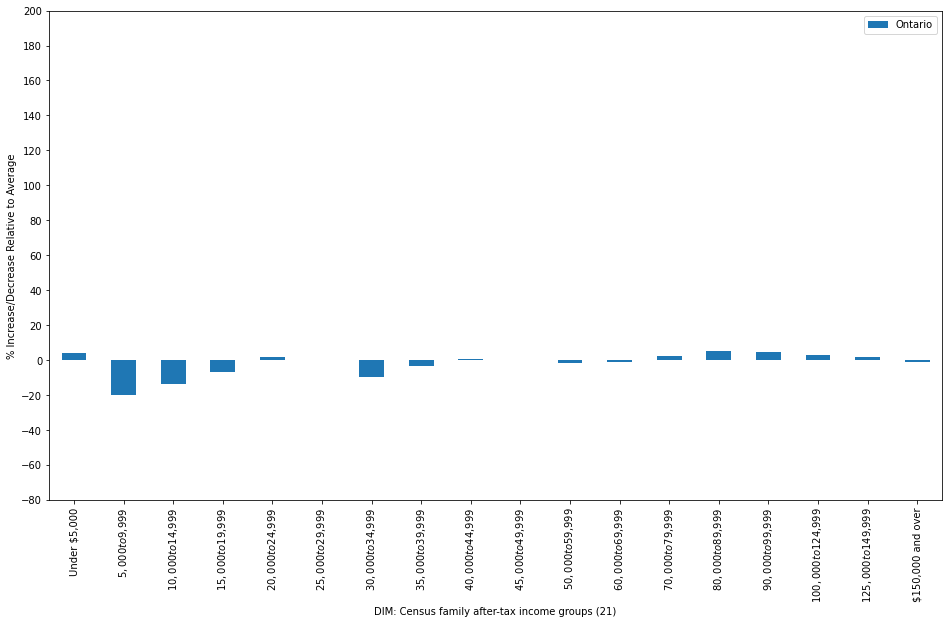

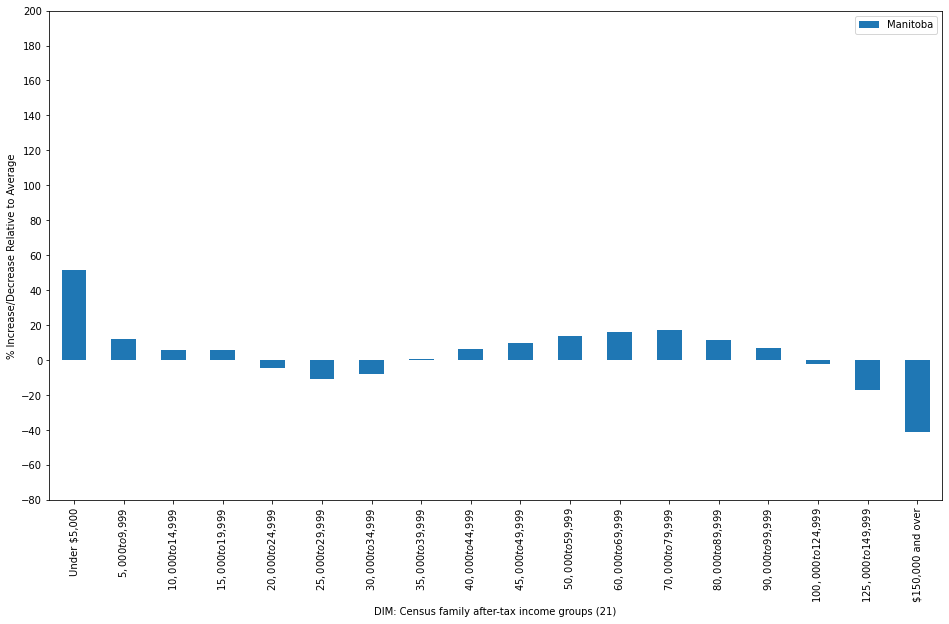

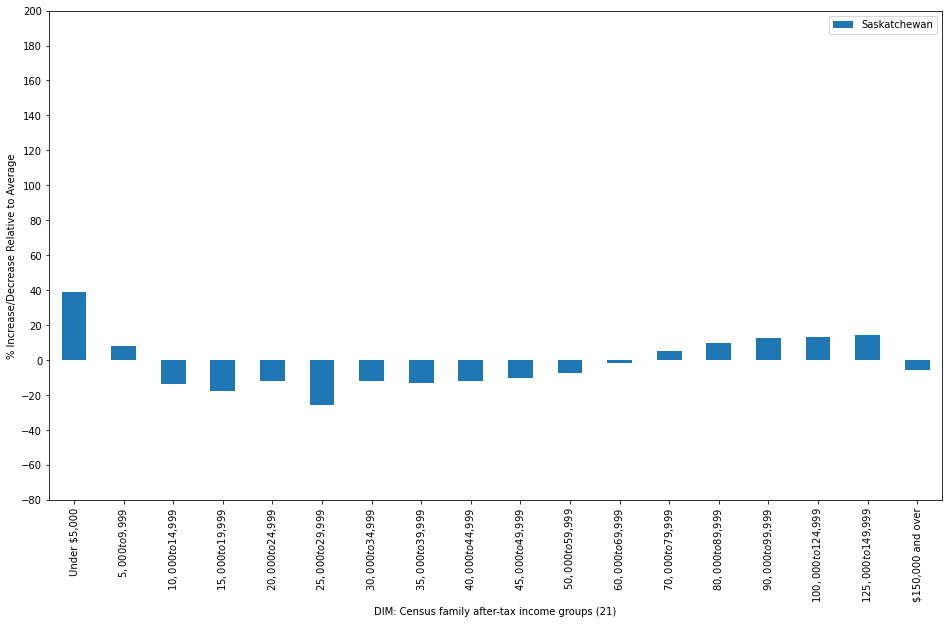

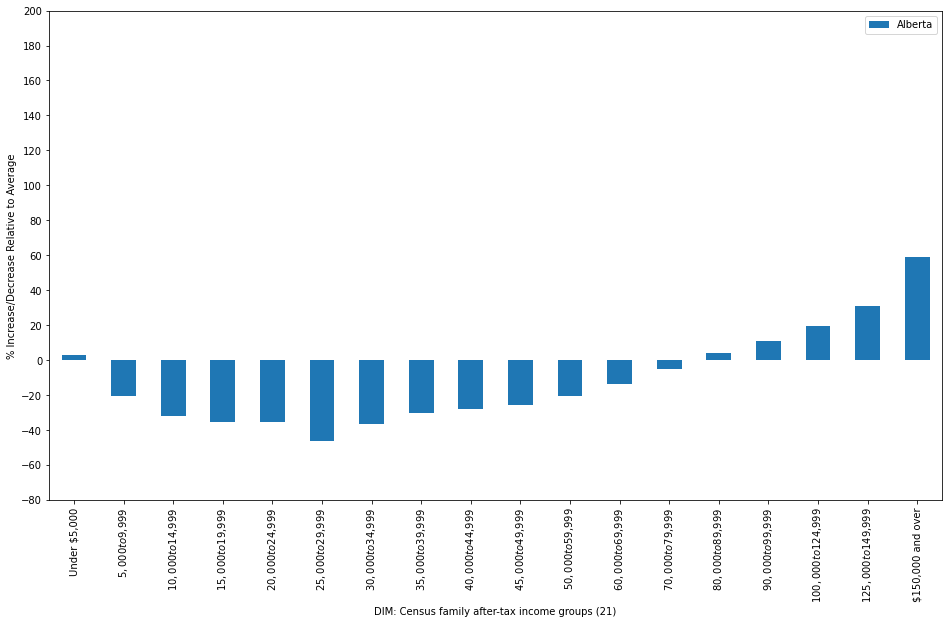

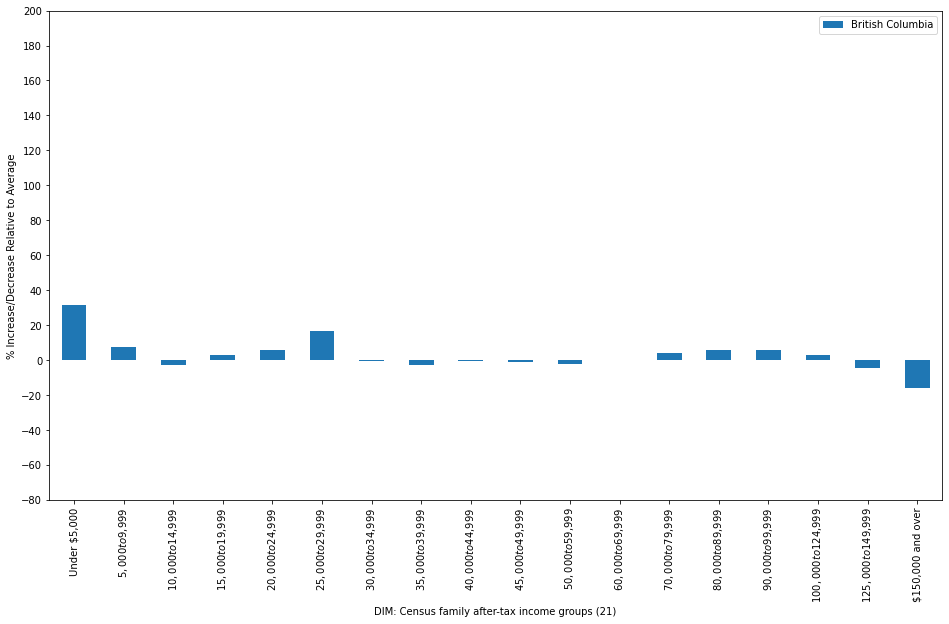

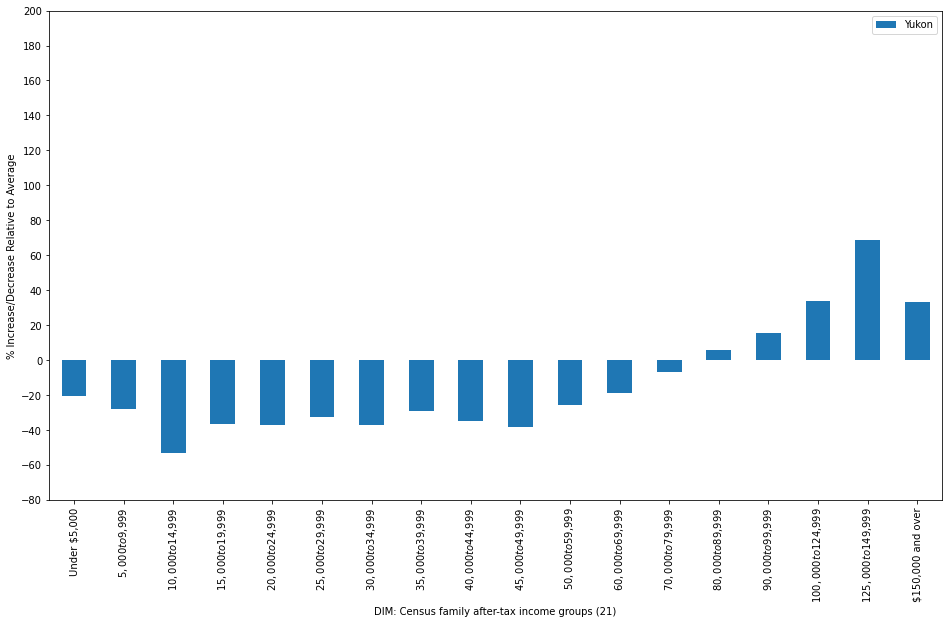

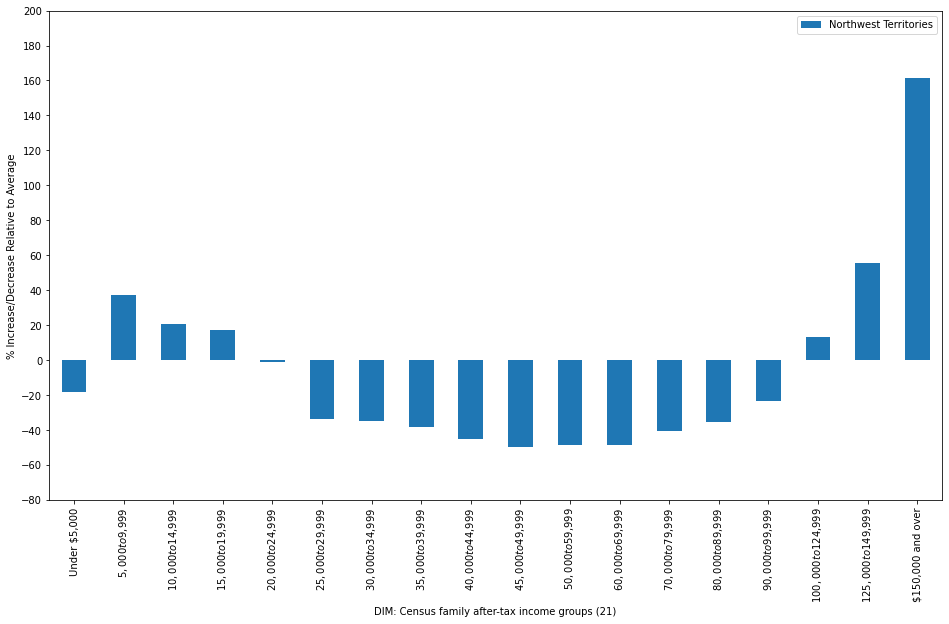

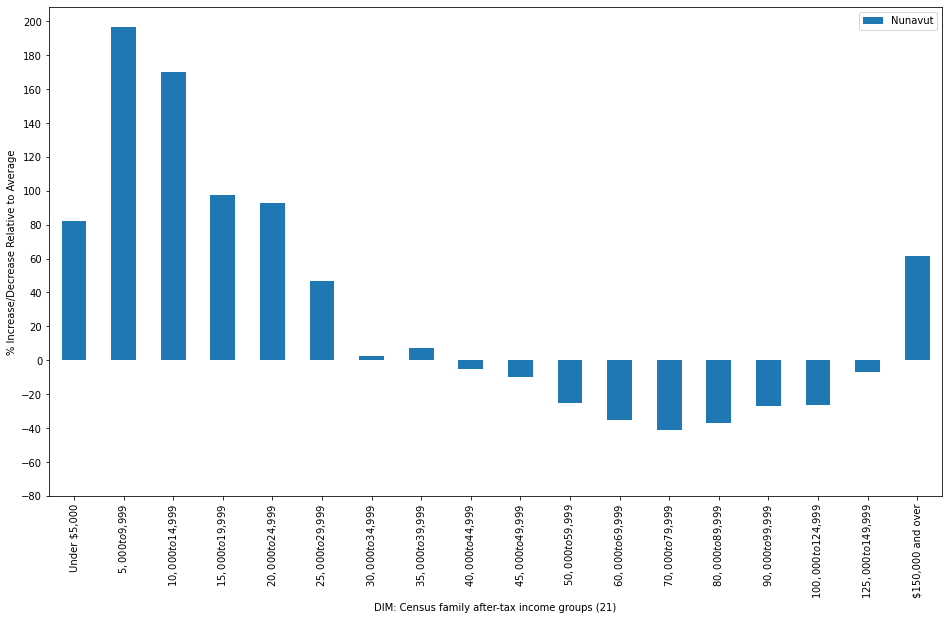

In [19]:
for k in range(len(pdiff.columns)):
  pdiff.iloc[:,k:k+1].plot(kind='bar', figsize=(16,9), yticks=range(-80,220,20), ylabel='% Increase/Decrease Relative to Average')

We should be cautious not to infer the makeup of the distribution of income groups when looking at these graphs. Additionally, we must consider the overall effects of small percentage increases on large populations, and vice versa. 
<br>
Let's take an example.
>We know that the average percentage of families in the Under $5,000 group is around 1% of all families. A +100% increase from the average results in there now being 2% of families in that group. A +200% increase from the average translates to 3%. On the whole, this is still a fairly small minority of the population. Now, that's not to say that these numbers are not significant, but we must keep in mind the size of the population *in combination* with the factor of change to accurately evaluate the implications of the data.

***
> Note: These observations are *relative* to the *average*.
>
Summary of Observations:
<br>
NL - significantly less VERY poor, a bit less very wealthy
<br>
PE, NS, NB, QC - less poor, less rich
<br>
ON - a bit less poor, a teeny  bit more rich
<br>
MB - more poor, more middle, less rich
<br>
SK - more very very poor, more rich
<br>
AB, YT - less poor, more rich
<br>
BC - more poor, less very rich
<br>
NT - less middle, more poor, A LOT more rich
<br>
NU - A LOT more poor, less rich, more super rich

### Discussion
"Rich" and "Poor" families are too loosely defined. They could be defined perhaps in relation to the cost of living in each region. The terms could also be defined more simply by grouping the buckets into larger buckets. Either way, the analysis should probably be redone because of this.

# BC Families with Young Children

## Description
This section analyzes the data on families with young children (ages 0-5 years old) in British Columbia.

## Summary
* The higher income group families in BC are more likely to have young children

## Data
This section provides the process by which the data was analyzed.

In [1]:
import pandas as pd

### Obtaining and Cleaning Data

In [2]:
# the dataset can be downloaded at:
# https://www12.statcan.gc.ca/census-recensement/2016/dp-pd/dt-td/Rp-eng.cfm?TABID=4&LANG=E&A=R&APATH=3&DETAIL=0&DIM=0&FL=A&FREE=0&GC=01&GL=-1&GID=1235625&GK=1&GRP=1&O=D&PID=110237&PRID=10&PTYPE=109445&S=0&SHOWALL=0&SUB=0&Temporal=2016&THEME=119&VID=0&VNAMEE=&VNAMEF=&D1=0&D2=0&D3=0&D4=0&D5=0&D6=0

In [3]:
# reference: https://stackoverflow.com/questions/25962114/how-do-i-read-a-large-csv-file-with-pandas
# testing chunks in pandas
for chunk in pd.read_csv('/content/drive/MyDrive/98-400-X2016105_English_CSV_data.csv', chunksize=52920):
  if chunk.iloc[0,3] == 'British Columbia':
    print(chunk.iloc[0, 3])
    small_bc = chunk

British Columbia


In [4]:
fam_struct = small_bc['Member ID: Census family structure (7)'] == 1
fam_size = small_bc['Member ID: Family size of census family (4)'] == 1
ages = small_bc['Member ID: Ages of census family members (18)'] == 3
working = small_bc['Member ID: Number of earners in the census family (5)'] == 1
#income = small_bc['Member ID: Census family after-tax income groups (21)'] == 2
interest_group = small_bc.loc[fam_struct & fam_size & ages & working]

In [5]:
interest_group.head()

,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,DATA_QUALITY_FLAG,ALT_GEO_CODE,DIM: Census family structure (7),Member ID: Census family structure (7),Notes: Census family structure (7),DIM: Family size of census family (4),Member ID: Family size of census family (4),Notes: Family size of census family (4),DIM: Ages of census family members (18),Member ID: Ages of census family members (18),Notes: Ages of census family members (18),DIM: Number of earners in the census family (5),Member ID: Number of earners in the census family (5),Notes: Number of earners in the census family (5),DIM: Census family after-tax income groups (21),Member ID: Census family after-tax income groups (21),Notes: Census family after-tax income groups (21),Dim: Year (2): Member ID: [1]: 2015 (Note: 2),Dim: Year (2): Member ID: [2]: 2005 (Note: 3)
7514850,2016,59,1,British Columbia,4.9,20000,59,Total - Census family structure,1,NaN,Total - Census families by family size,1,NaN,1 person or more,3,NaN,Total - Number of earners in the census family,1,NaN,Total - After-tax income of census family,1,NaN,198800,183670
7514851,2016,59,1,British Columbia,4.9,20000,59,Total - Census family structure,1,NaN,Total - Census families by family size,1,NaN,1 person or more,3,NaN,Total - Number of earners in the census family,1,NaN,"Under $5,000",2,NaN,3865,3550
7514852,2016,59,1,British Columbia,4.9,20000,59,Total - Census family structure,1,NaN,Total - Census families by family size,1,NaN,1 person or more,3,NaN,Total - Number of earners in the census family,1,NaN,"$5,000 to $9,999",3,NaN,2835,4170
7514853,2016,59,1,British Columbia,4.9,20000,59,Total - Census family structure,1,NaN,Total - Census families by family size,1,NaN,1 person or more,3,NaN,Total - Number of earners in the census family,1,NaN,"$10,000 to $14,999",4,NaN,3615,4995
7514854,2016,59,1,British Columbia,4.9,20000,59,Total - Census family structure,1,NaN,Total - Census families by family size,1,NaN,1 person or more,3,NaN,Total - Number of earners in the census family,1,NaN,"$15,000 to $19,999",5,NaN,5075,6475


In [6]:
# save the total number of families for each year
bc_families_2015 = interest_group.at[7514850, 'Dim: Year (2): Member ID: [1]: 2015 (Note: 2)']
bc_families_2005 = interest_group.at[7514850, 'Dim: Year (2): Member ID: [2]: 2005 (Note: 3)']
bc_families_2015, bc_families_2005

(198800, 183670)

In [7]:
interest_group.drop(index=[7514850,7514866,7514870], inplace=True)
interest_group.set_index('DIM: Census family after-tax income groups (21)', inplace=True)
interest_group = interest_group[['Dim: Year (2): Member ID: [1]: 2015 (Note: 2)', 'Dim: Year (2): Member ID: [2]: 2005 (Note: 3)']]
interest_group

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Dim: Year (2): Member ID: [1]: 2015 (Note: 2),Dim: Year (2): Member ID: [2]: 2005 (Note: 3)
DIM: Census family after-tax income groups (21),,
"Under $5,000",3865,3550
"$5,000 to $9,999",2835,4170
"$10,000 to $14,999",3615,4995
"$15,000 to $19,999",5075,6475
"$20,000 to $24,999",5760,7105
"$25,000 to $29,999",6925,7130
"$30,000 to $34,999",7750,7095
"$35,000 to $39,999",7715,8785
"$40,000 to $44,999",7800,10790


### Proportional Values

In [8]:
# scale values based on number of respondents
interest_group['Dim: Year (2): Member ID: [1]: 2015 (Note: 2)'] = interest_group['Dim: Year (2): Member ID: [1]: 2015 (Note: 2)'] / bc_families_2015 * 100
interest_group['Dim: Year (2): Member ID: [2]: 2005 (Note: 3)'] = interest_group['Dim: Year (2): Member ID: [2]: 2005 (Note: 3)'] / bc_families_2005 * 100
interest_group

,Dim: Year (2): Member ID: [1]: 2015 (Note: 2),Dim: Year (2): Member ID: [2]: 2005 (Note: 3)
DIM: Census family after-tax income groups (21),,
"Under $5,000",1.944165,1.932814
"$5,000 to $9,999",1.426056,2.270376
"$10,000 to $14,999",1.818410,2.719551
"$15,000 to $19,999",2.552817,3.525344
"$20,000 to $24,999",2.897384,3.868351
"$25,000 to $29,999",3.483400,3.881962
"$30,000 to $34,999",3.898390,3.862906
"$35,000 to $39,999",3.880785,4.783035
"$40,000 to $44,999",3.923541,5.874667


### Visualization

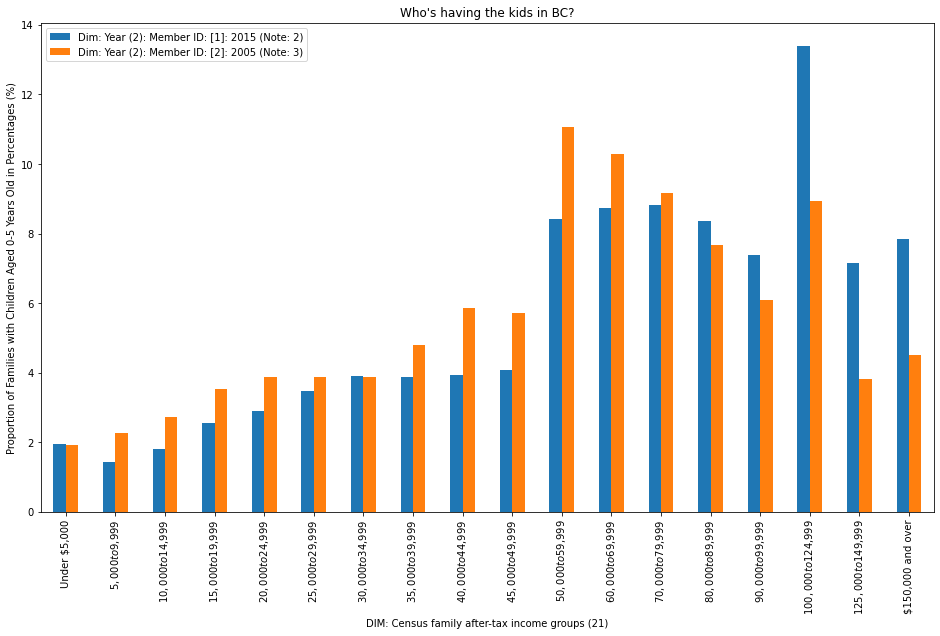

In [9]:
interest_group.plot(kind='bar', title="Who's having the kids in BC?", figsize=(16,9), ylabel='Proportion of Families with Children Aged 0-5 Years Old in Percentages (%)')

It looks like the majority of young children are had on the wealthy side of households. Although this was true in both 2005 and 2015, the trend seems to indicate that child bearing has shifted even further towards the highest earning families.

### Discussion
Why are the majority of young children in higher income households? I suspect it may be because the cost of raising children can only be undertaken by these higher earners. The costs of living in BC may be discouraging couples from choosing to have kids.